In [1]:
import lightkurve as lk
import glob
import os
import numpy as np
import starspot as ss
from astropy.table import Table, join,vstack
import pandas as pd
from starspot import sigma_clipping
from astropy.io import ascii

from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
#dont rerun unless need to remove another 'bad' tic id
# tics_list = np.load('data/cool_cvz_tics.npy')
# print('before:',len(tics_list))
# there = []
# for count,i in enumerate(tics_list):
#     if i == '399646462': #'38877648':
#         print(count,i)
#     else:
#         there.append(i)
# there = np.array(there)
# print('after:',len(there))
#np.save('data/cool_cvz_tics',there)

In [4]:
#tics_list[17544]

In [7]:
#tic order
ids = np.load('data/THIRDRUN/tic_order.npy')
#rvar
rvar = np.load('data/THIRDRUN/rvar_original.npy')

#need to stitch & confirm same order as other arrays from third run
# NOT SURE HOW TO REMOVE THose two TIC ids B/C FORGOT WHICH ID IT WAS..GOTTA CROSS CHECK AGAINST ids to see whats missing
totsector1 = np.load('data/SECONDRUN/old2ndrunStats/stitched_sectors.npy')
totsector2 = np.load('data/SECONDRUN/old2ndrunStats/stitched_sectors2.npy')
totsectors_rd = np.append(totsector1,totsector2)
ticorder1 = np.load('data/SECONDRUN/old2ndrunStats/tic_order.npy')
ticorder2 = np.load('data/SECONDRUN/old2ndrunStats/tic_order2.npy')
ticorder_rd = np.append(ticorder1,ticorder2)

t = Table([ticorder_rd,totsectors_rd],names=('ID','TOTsecs'))
print('t len',len(t))


acf1 = np.load('data/THIRDRUN/acf_rp1.npy')
acf2 = np.load('data/THIRDRUN/acf_rp2.npy')
acf3 = np.load('data/THIRDRUN/acf_rp3.npy')
ls1 = np.load('data/THIRDRUN/ls_rp1.npy')
ls2 = np.load('data/THIRDRUN/ls_rp2.npy')
ls3 = np.load('data/THIRDRUN/ls_rp3.npy')
acfamp1 = np.load('data/THIRDRUN/acf_amp1.npy')
acfamp2 = np.load('data/THIRDRUN/acf_amp2.npy')
acfamp3 = np.load('data/THIRDRUN/acf_amp3.npy')
lsamp1 = np.load('data/THIRDRUN/ls_amp1.npy')
lsamp2 = np.load('data/THIRDRUN/ls_amp2.npy')
lsamp3 = np.load('data/THIRDRUN/ls_amp3.npy')



print(len(ids),len(rvar),len(acf2),len(acfamp2),len(ls2),len(lsamp1))


#if in progress needs ids[:-1],rvar[:-1]
stats = Table([ids,rvar,acf1,ls1,acf2,ls2,acf3,ls3,acfamp1,acfamp2,acfamp3,lsamp1,lsamp2,lsamp3], \
              names=('ID','rvar','acf1','ls1','acf2','ls2','acf3','ls3','acfamp1','acfamp2','acfamp3','lsamp1', \
                     'lsamp2','lsamp3'))
tictable = ascii.read('data/tic_table.fits') #tic catalog for teffs
tictable['ID'] = tictable['ID'].astype(str) #so next line can match ID (theyll have same dtype)
ft = join(stats,tictable)
nt = join(t,ft)
print(len(ft))
nt
#saving this----already run
#nt.write('data/THIRDRUN/big_stats_3rdrun.fits',format='fits',overwrite=True)

t len 22631
22629 22629 22629 22629 22629 22629
22629


## adding in additional tics to data by sector

In [30]:
#these are the 2 table want to combine

#original data
ogstats = Table.read('data/THIRDRUN/big_stats_3rdrun.fits') #only cooltics
ogstats
#additional data
addstats = Table.read('data/THIRDRUN/stats_table_ADDITIONS.fits') #1457 #only add tics
#addstats #id column uses integers
ogstats #id column uses strings

<Table masked=True length=22631>
    ID    TOTsecs          rvar         ... raddflag wdflag   objID   
 bytes21   int64         float64        ...  int64   int64    int64   
--------- ------- --------------------- ... -------- ------ ----------
117935303       1 0.0018316209316253662 ...        1      0 1420035826
118010415       1 0.0033662557601930043 ...        1      0 1420037348
118053599       1   0.03137373924255371 ...        1      0 1421763271
118054887       1   0.02897542715072632 ...        1      0 1423434296
118055540       1  0.004783421754836925 ...        1      0 1423434592
118060883       1  0.003953725099563599 ...        1      0 1425185189
118074571       3  0.003131073713302568 ...        0      0  644506696
118078652       2   0.12548530101776123 ...        1      0  644509732
118079187       2 0.0027418762445450273 ...        1      0  644510128
118079457       2   0.09145613312721246 ...        1      0  644510318
      ...     ...                   ... ...      ...    ...        ...
 90832108       1  0.008478307723998935 ...        1      0 1017443682
 90832769       1  0.007510197162628129 ...        1      0 1017444235
 90836525       1   0.12321843206882477 ...        1      0 1017447252
 97605892       1  0.012793710827827431 ...        0      0  985258525
 97616288       1  0.002616298198700129 ...        1      0  985268515
 97739446       1  0.002626934647560031 ...        1      0  985276281
 97876254       1   0.04368203878402699 ...        1      0  985302109
 97876609       1   0.06516473889350882 ...        1      0  985302451
 98139294       1   0.02658629715442673 ...        1      0  986759192
 98237214       1   0.01701425909996024 ...        1      0  986764261

In [31]:
#making strings into int to compare

iis=[]
for i in ogstats['ID']:
    ii = int(i)
    iis.append(ii)
ogstats['ID'] = iis
#ogstats

<Table masked=True length=22631>
    ID    TOTsecs          rvar         ... raddflag wdflag   objID   
  int64    int64         float64        ...  int64   int64    int64   
--------- ------- --------------------- ... -------- ------ ----------
117935303       1 0.0018316209316253662 ...        1      0 1420035826
118010415       1 0.0033662557601930043 ...        1      0 1420037348
118053599       1   0.03137373924255371 ...        1      0 1421763271
118054887       1   0.02897542715072632 ...        1      0 1423434296
118055540       1  0.004783421754836925 ...        1      0 1423434592
118060883       1  0.003953725099563599 ...        1      0 1425185189
118074571       3  0.003131073713302568 ...        0      0  644506696
118078652       2   0.12548530101776123 ...        1      0  644509732
118079187       2 0.0027418762445450273 ...        1      0  644510128
118079457       2   0.09145613312721246 ...        1      0  644510318
      ...     ...                   ... ...      ...    ...        ...
 90832108       1  0.008478307723998935 ...        1      0 1017443682
 90832769       1  0.007510197162628129 ...        1      0 1017444235
 90836525       1   0.12321843206882477 ...        1      0 1017447252
 97605892       1  0.012793710827827431 ...        0      0  985258525
 97616288       1  0.002616298198700129 ...        1      0  985268515
 97739446       1  0.002626934647560031 ...        1      0  985276281
 97876254       1   0.04368203878402699 ...        1      0  985302109
 97876609       1   0.06516473889350882 ...        1      0  985302451
 98139294       1   0.02658629715442673 ...        1      0  986759192
 98237214       1   0.01701425909996024 ...        1      0  986764261

In [52]:
#fixing addstats columns to merge with ogstats

#create table with totalnumsectors info
numsecs = pd.read_csv('data/THIRDRUN/numofsectors_ADDITIONS.csv')
numsecs.values[0][1] #(tic, number)
tics =[]
nums = []
for row in numsecs.values:
    tic = int(row[0])
    num = row[1]
    tics.append(tic)
    nums.append(num)
addcol = Table([tics,nums],names=('ID','TOTsecs'))
#add it to table
addedstats = join(addcol,addstats)

#renaming columns to match
addedstats['Rvar'].name = 'rvar'
addedstats['ls_rp1'].name = 'ls1'
addedstats['ls_rp2'].name = 'ls2'
addedstats['ls_rp3'].name = 'ls3'
addedstats['ls_amp1'].name = 'lsamp1'
addedstats['ls_amp2'].name = 'lsamp2'
addedstats['ls_amp3'].name = 'lsamp3'
addedstats['acf_rp1'].name = 'acf1'
addedstats['acf_rp2'].name = 'acf2'
addedstats['acf_rp3'].name = 'acf3'
addedstats['acf_amp1'].name = 'acfamp1'
addedstats['acf_amp2'].name = 'acfamp2'
addedstats['acf_amp3'].name = 'acfamp3'

#adding tic catalog
tictable = ascii.read('data/tic_table.fits') #tic catalog for new & additional tics

addtable = join(addedstats,tictable)

#len(addedstats), 
addtable

<Table masked=True length=1457>
    ID    TOTsecs          rvar         ... raddflag wdflag   objID  
  int64    int64         float64        ...  int64   int64    int64  
--------- ------- --------------------- ... -------- ------ ---------
 25063396      11 0.0027092844247817993 ...        1      0 523671670
 25078120      10  0.010072106122970714 ...        1      0 523673578
 25078674      13 0.0007094740867614746 ...        1      0 523674132
 25081173      12 0.0038849890232085516 ...        1      0 523911584
 25117273      13  0.011503872275352212 ...        1      0 523913855
 25117406      10  0.017531299591064364 ...        1      0 523913988
 25132314      12  0.003282487392425537 ...        1      0 524185721
 25133286      13    2.2395513504743567 ...        1      1 524186547
 25153007      12  0.002014163136482283 ...        1      0 524188164
 25155664      12  0.008279427886009216 ...        1      0 524444465
      ...     ...                   ... ...      ...    ...       ...
453079732      13  0.001349121332168579 ...        1      0 601984997
453079811      13 0.0014382004737854004 ...        1      0 601985076
453079880      11 0.0017330646514892578 ...        1      0 601985145
453081052      13  0.006191670894622803 ...        1      0 601986317
453099404      12 0.0006448626518249512 ...        1      0 609601487
453099697      13 0.0025476306676864846 ...        1      0 609601737
471013553      10     38.63148260116577 ...       --      0 550056583
471013582      12    1.4520987004041672 ...       --      0 557547661
471015190      10  0.005200803279876709 ...       --      0 562968515
471015740      12  0.013174203038215704 ...        1      0 529487153

In [28]:
# addtics = np.load('data/additional_cvz_tics.npy')
# cooltics = np.load('data/cool_cvz_tics.npy')
# alltics = np.load('data/all_dled_tics.npy')
# iis=[]
# for i in alltics:
#     ii = int(i)
#     iis.append(ii)
# length = []
# miss=[]
# for tic in ogstats['ID']:
#     if tic in cooltics:
#         length.append(tic)
#     else:
#         miss.append(tic)
#         #continue
# print(len(length),len(miss),len(addtics),len(cooltics),len(alltics),len(addstats))

22631 0 1457 22629 24086 1457


In [60]:
bigtable = vstack([addtable,ogstats])
print(len(addtable),len(ogstats),len(bigtable),  len(addtable)+len(ogstats) )
bigtable

1457 22631 24088 24088


In [62]:
#saving ----already ran & saved
#bigtable.write('data/THIRDRUN/big_stats_stitchedlcs.fits',format='fits',overwrite=True)

In [3]:
secstats = ascii.read('data/bigstats_by_sector.fits') #onlly cooltics -must add addtics
addtics = np.load('data/additional_cvz_tics.npy')
cooltics = np.load('data/cool_cvz_tics.npy')
print(type(cooltics[0]),type(secstats['ID'][0]))
iii=[]
for i in cooltics:
    ii = int(i)
    iii.append(ii)
print(type(iii[0]))
hold =[]
for tic in secstats['ID']:
    if tic in iii:
        hold.append(tic)
print(len(hold),len(secstats['ID']),len(addtics),len(iii))

<class 'numpy.str_'> <class 'numpy.int64'>
<class 'int'>
95231 95231 1457 22629


In [4]:
addtics

array([ 25078674,  25081173,  25117273, ..., 382101389, 382159806,
       388131734])

In [5]:
secstats[secstats['ID']==25078674]

<Table masked=True length=0>
  ID  NUMsectors sector   rvar    ls1   ... e_Dec_orig raddflag wdflag objID
int64   int64    int64  float64 float64 ...  float64    int64   int64  int64
----- ---------- ------ ------- ------- ... ---------- -------- ------ -----

In [34]:
stats

<Table length=1457>
    ID             Rvar         ...       acf_amp2             acf_amp3      
  int64          float64        ...       float64              float64       
--------- --------------------- ... -------------------- --------------------
 25078674 0.0007094740867614746 ... 0.035125713919498945  0.03488179985900459
 25081173 0.0038849890232085516 ...  0.09470368338888219  0.08979592327284891
 25117273  0.011503872275352212 ...   0.1723212321665371  0.16890693876729998
 25132314  0.003282487392425537 ...   0.5979633345648373   0.5609227167731954
 25133286    2.2395513504743567 ...  0.14038385819931345  0.09368080500644746
 25153007  0.002014163136482283 ...  0.07801796512675632  0.07801070558398264
 25155664  0.008279427886009216 ...   0.7282297990105875   0.6825590923112066
 25196356  0.001644134521484375 ...  0.04350841152507035  0.04350525756450588
 29759800 0.0039213597774505615 ...  0.01700924798785482  0.01627781915969531
 29779053 0.0021646082401275413 ...  0.06636872097646514   0.0663662111154263
      ...                   ... ...                  ...                  ...
350824806  0.008145821094513117 ...   0.4102507498332274  0.41020746258815444
358112997  0.015625357627868652 ...  0.05872317503971048 0.056765739091239976
370040241 0.0055537849664688554 ...   0.5832484907956939  0.33709428540996184
374944608  0.010181200504302934 ...  0.41742279335375626   0.3499514240470629
374997308  0.005232784152030989 ...   0.0664454409463879  0.06622982611408915
375056762  0.002962684631347745 ... 0.034711221141250484  0.03096724503753465
381975024  0.004076093435287476 ...   0.1708375170204697   0.1582851548812118
382101389  0.007688313722610363 ...  0.06916943773870751  0.06749917737915685
382159806  0.014622724056243874 ...  0.18534497248322482   0.1787200981428773
388131734  0.018540114164352417 ...   0.5651588927700815   0.5363647916862365

In [29]:
morethan10 = nt[nt['TOTsecs'] >10]
elevent = nt[nt['TOTsecs'] == 11]
twelevet = nt[nt['TOTsecs'] == 12]
defcvz_og = nt[nt['TOTsecs'] ==13]
print(len(morethan10),len(elevent),len(twelevet),len(defcvz_og))

3907 874 1626 1407


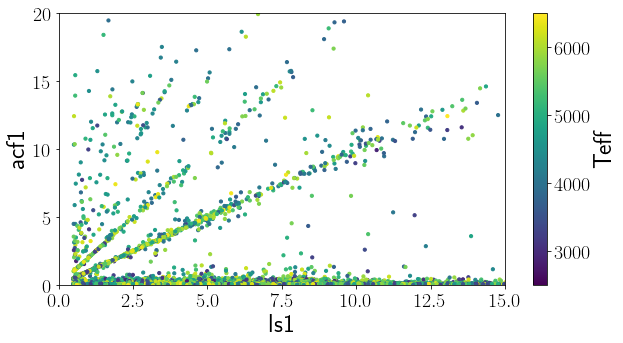

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(ft['ls1'],ft['acf1'],s=10,c=ft['Teff'],vmax=6500,vmin=2500)
plt.xlabel('ls1');
plt.ylabel('acf1');
plt.colorbar().set_label('Teff');
plt.ylim(0,20);
plt.xlim(0,15);

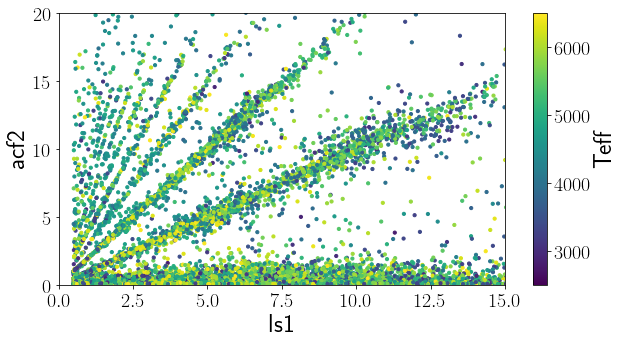

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(ft['ls1'],ft['acf2'],s=10,c=ft['Teff'],vmax=6500,vmin=2500)
plt.xlabel('ls1');
plt.ylabel('acf2');
plt.colorbar().set_label('Teff');
plt.ylim(0,20);
plt.xlim(0,15);

215.70187377929688
0.0002478957176208496


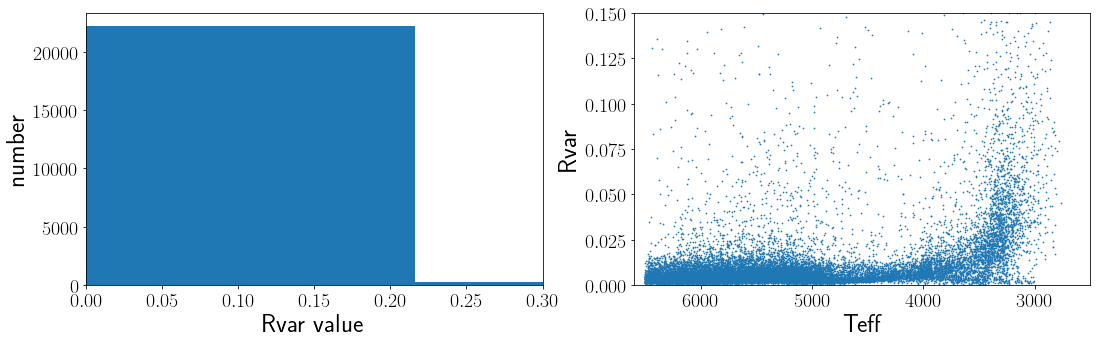

In [14]:
x = np.arange(0,len(ft),1)

f,(ax1,ax2) = plt.subplots(1,2,figsize=(18,5))

ax1.hist(ft['rvar'],bins=1000); #log bins takes forever
ax1.set_xlim(0,.3);
ax1.set_ylabel('number')
ax1.set_xlabel('Rvar value')

ax2.scatter(ft['Teff'],ft['rvar'],s=.5);
ax2.set_xlabel('Teff')
ax2.set_ylabel('Rvar')
ax2.set_ylim(0,.15);
ax2.set_xlim(6600,2500)
print(np.max(ft['rvar']))
print(np.min(ft['rvar']))


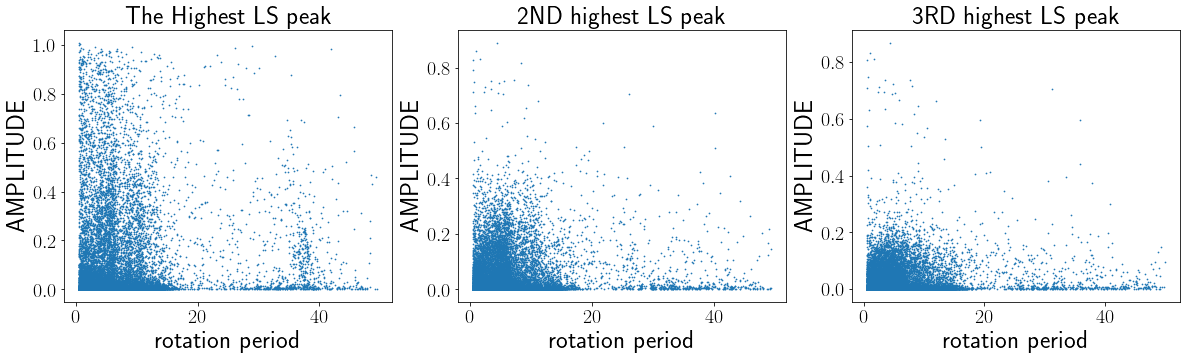

In [15]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))

ax1.scatter(ft['ls1'],ft['lsamp1'],s=.5)
ax1.set_ylabel('AMPLITUDE')
ax1.set_xlabel('rotation period');
ax1.set_title('The Highest LS peak',fontsize=25);

ax2.scatter(ft['ls2'],ft['lsamp2'],s=.5)
ax2.set_ylabel('AMPLITUDE')
ax2.set_xlabel('rotation period');
ax2.set_title('2ND highest LS peak',fontsize=25);

ax3.scatter(ft['ls3'],ft['lsamp3'],s=.5)
ax3.set_ylabel('AMPLITUDE')
ax3.set_xlabel('rotation period');
ax3.set_title('3RD highest LS peak',fontsize=25);

# below shows that some of these high rvars maybe binaries

156 0.9509994665470389
2974 0.9838442126676962
3009 0.972190486600194
4315 0.974091155784699
4710 0.9556885620627893
5155 0.9572592196871532
5364 0.9890191552141729
5474 0.9830686522408109
5490 0.9830395869309103
5491 0.9730659294908118
6597 0.9938233619491311
7184 0.9658084864223565
7748 0.9623985061873301
9629 0.9633229417692264
9788 0.9626059371155403
9820 0.9728277655275914
9890 0.9725946106108067
10140 1.0085555724164308
11620 0.9707513054904796
11651 0.9929192224062904
11652 0.9577102668756257
12053 0.9514498752613328
12286 0.9767798500122993
12486 0.9794508539762752
12618 0.9590607501357286
12973 0.9857181458697419
12976 0.9991605306538913
15085 0.9641113701169777
15798 0.973014196860636
15908 0.9804288714395896
17718 0.9550953895331883
17957 0.9769056472168076
18146 0.954959527979714
18630 0.9587717891808054
18835 0.9636705538921132
19456 1.0030095480558596
20070 0.9513886990553765
20489 0.952555543117044
20528 0.983618750102614
20592 0.954698243960786
20657 0.9595229687641674


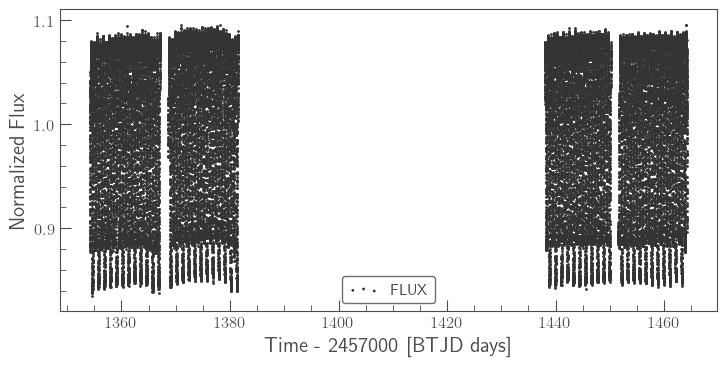

In [16]:
#for count,row in enumerate(ft):
for count,amp in enumerate(ft['lsamp1']):
    #for amp in amps:
    if amp >=.95:
        print(count,amp)
        tic = ft['ID'][count]
        #print(count,tic)
        path = 'data/SECONDRUN/cleaned_LightCurves/{}/lc.fits'.format(tic)
        if count == 10140:
            lc = lk.open(path)
            lc.scatter()

In [17]:
def generate_values_for_filename(filename):
    with open(filename) as f:
        for line in f:
            for row in line.split('\n'): #this splits by line
                #print(row)
                for word in row.split(' '): #this splits by blank space
                    #print(word)
                    yield word

In [18]:


values = list(generate_values_for_filename('/Users/helenfellow/Desktop/all_targets_S007_v1.txt'))
values
# ticid=np.array(values[0::1])
# # camera=np.array(values[20::16])
# # ra=np.array(values[21::16])
# # dec=np.array(values[28::16])
# tests=[]
# # for i in ticid:
# #     print('start of it',i,'end of it')
# for count,line in enumerate(values):
#     #print('count:',count,';',line)
#     #print(len(line))
#     if count >54:
#         if len(line) > 0:
#             print('yes:',line[0:8])
#             tests.append(line[0:8])
#     else:
#         pass
# #     mytest = np.array(i[0:10])
# #     print(type(mytest),mytest,'next',mytest.shape)
    
    
    
    
    
# #     print(mytest[0],'test')
# #     if mytest[0] == '-':
# #         print('skipping')
# #     else:
# #         tests.append(mytest)
# #         print(mytest)
#     #print(mytest,'next row or line')

['#',
 '',
 '#',
 'Full',
 'target',
 'list',
 'for',
 'orbit',
 '21,',
 'sector',
 '7',
 '',
 '#',
 'Created',
 'Fri',
 'Jan',
 '18',
 '23:06:11',
 'EST',
 '2019',
 '',
 '',
 '#',
 'Concatenation',
 'of',
 'GI',
 'astero',
 'exo',
 'bright',
 'DDT',
 'ppas',
 'lists',
 '',
 '#',
 '',
 '#',
 'TICID\t',
 '',
 '',
 '',
 '',
 '',
 'Camera',
 '',
 '',
 'CCD\tTmag\t',
 '',
 '',
 'RA\t\t',
 '',
 'Dec\x08',
 '',
 '',
 '',
 '',
 '687046\t2\t3\t14.02\t119.5535\t-16.3268',
 '',
 '',
 '',
 '',
 '687308\t2\t3\t15.04\t119.6417\t-16.1779',
 '',
 '',
 '',
 '',
 '687627\t2\t3\t13.24\t119.5574\t-15.9916',
 '',
 '',
 '',
 '',
 '687634\t2\t3\t11.37\t119.5563\t-15.9881',
 '',
 '',
 '',
 '',
 '689318\t2\t3\t',
 '8.23\t119.6067\t-15.0217',
 '',
 '',
 '',
 '',
 '758285\t2\t3\t',
 '7.92\t119.7163\t-13.3159',
 '',
 '',
 '',
 '',
 '823128\t2\t3\t',
 '8.17\t123.8517\t-16.6438',
 '',
 '',
 '',
 '',
 '824169\t2\t3\t15.26\t123.8926\t-15.8912',
 '',
 '',
 '',
 '',
 '827160\t2\t3\t',
 '4.87\t123.8897\t-13.6242',
 '',

## investigating cvz tics

In [30]:
#omg so much better
sec1 = ascii.read('/Users/helenfellow/Desktop/all_targets_S001_v1.txt')
sec2 = ascii.read('/Users/helenfellow/Desktop/all_targets_S002_v1.txt')
sec3 = ascii.read('/Users/helenfellow/Desktop/all_targets_S003_v1.txt')
sec4 = ascii.read('/Users/helenfellow/Desktop/all_targets_S004_v1.txt')
sec5 = ascii.read('/Users/helenfellow/Desktop/all_targets_S005_v1.txt')
sec6 = ascii.read('/Users/helenfellow/Desktop/all_targets_S006_v1.txt')
sec7 = ascii.read('/Users/helenfellow/Desktop/all_targets_S007_v1.txt')
sec8 = ascii.read('/Users/helenfellow/Desktop/all_targets_S008_v1.txt')
sec9 = ascii.read('/Users/helenfellow/Desktop/all_targets_S009_v1.txt')
sec10 = ascii.read('/Users/helenfellow/Desktop/all_targets_S010_v1.txt')
sec11 = ascii.read('/Users/helenfellow/Desktop/all_targets_S011_v1.txt')
sec12 = ascii.read('/Users/helenfellow/Desktop/all_targets_S012_v1.txt')
sec13 = ascii.read('/Users/helenfellow/Desktop/all_targets_S013_v1.txt')




ticsec1 = sec1['col1']
ticsec2 = sec2['col1']
ticsec3 = sec3['col1']
ticsec4 = sec4['col1']
ticsec5 = sec5['col1']
ticsec6 = sec6['col1']
ticsec7 = sec7['col1']
ticsec8 = sec8['col1']
ticsec9 = sec9['col1']
ticsec10 = sec10['col1']
ticsec11 = sec11['col1']
ticsec12 = sec12['col1']
ticsec13 = sec13['col1']



#think about best way to cross match these arrays....maybefind that unique tic script i wrote


In [2]:
#columns:
# TIC.   #Camera.    #CCD.   #Tmag.     #RA.     #Dec.   
camera4=[]
camera3=[]
alltics=[]
allcams=[]
for i in range(1,14,1):
    if i <10:
        f = ascii.read('/Users/helenfellow/Desktop/all_targets_S00{}_v1.txt'.format(i))
    else:
        f = ascii.read('/Users/helenfellow/Desktop/all_targets_S0{}_v1.txt'.format(i))
    for row in f:
        #print(row)
        #break
        camera = row['col2']
        tic = np.array(row['col1'])
        alltics.append(tic)
        allcams.append(camera)
        #for cam in camera:
        if camera == 4:
            camera4.append(tic)
        elif camera == 3:
            camera3.append(tic)
allcams=np.array(allcams)
alltics=np.array(alltics)
camera4=np.array(camera4)
camera3=np.array(camera3)
print(len(camera4),camera4.shape,len(camera3),camera3.shape)

97498 (97498,) 54977 (54977,)


In [14]:
#all 2min targets - no matter camera and seeing how many repeats there are ever
seen3 = {}
dupes3 = []

for x in alltics:
    if x not in seen3:
        seen3[x] = 1
    else:
        if seen3[x] == 1:
            dupes3.append(x)
        seen3[x] += 1
print(len(seen3),len(dupes3))

128292 35827


In [15]:
#duplicates across all cameras and all sectors

tab = Table([alltics,allcams],names=('tic','cam'))
# for i in dupes3:
#     idx = np.where(tab['tic']==i)
#     print(idx)
dupecams=[]
dupetics=[]
for row in tab:
    tic = row['tic']
    cam = row['cam']
    if tic in dupes3:
        dupecams.append(cam)
        dupetics.append(tic)
print(len(dupetics))

155434


In [ ]:
# sectors=[]
# for i in dupes:
#     i = int(i)
#     totals = seen[i]
#     sectors.append(totals)

# x=np.arange(len(sectors))
# plt.figure(figsize=(10,5))
# #plt.scatter(x,sectors,s=1)

# plt.hist(sectors,bins=13);#,histtype='bar');

In [4]:
#trying to figure out why so many dupe tics based on which/how many cameras observed


seenall = {}
dupesall = []

for x in alltics:
    if x not in seenall:
        seenall[x] = 1
    else:
        if seenall[x] == 1:
            dupesall.append(x)
        seenall[x] += 1
print(len(seenall),len(dupesall))

128292 35827


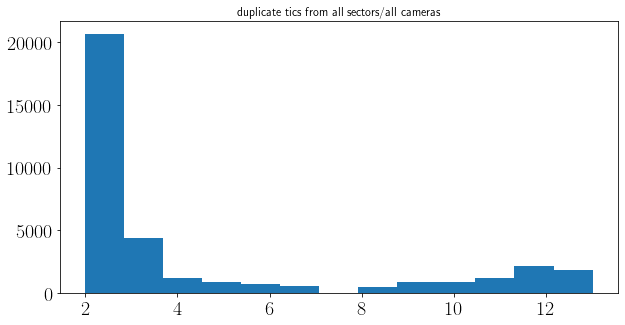

In [41]:
sectorsall=[]
for i in dupesall:
    i = int(i)
    totals = seenall[i]
    sectorsall.append(totals)

x=np.arange(len(sectorsall))
plt.figure(figsize=(10,5))
plt.hist(sectorsall,bins=13);#,histtype='bar');
plt.title('duplicate tics from all sectors/all cameras');

In [31]:
#all tic dupes all sec all cams
allsecs2=[]
tweleve2 =[]
eleven2 = []
ten2 =[]
fivetoten2=[]
lessthanfive2=[]
for i in dupesall:
    i = int(i)
    if seenall[i] == 13:
        allsecs2.append(i)
    elif seenall[i] == 12:
        tweleve2.append(i)
    elif seenall[i] == 11:
        eleven2.append(i)
    elif seenall[i] ==10:
        ten2.append(i)
    elif seenall[i] <5:
        lessthanfive2.append(i)
    else:
        fivetoten2.append(i)
print('13:',len(allsecs2),'12:',len(tweleve2),'11:',len(eleven2),'10:',len(ten2),'5-10:',len(fivetoten2),'<5:',len(lessthanfive2))

13: 1828 12: 2157 11: 1172 10: 853 5-10: 3644 <5: 26173


In [38]:
cvzog=[]
for i in defcvz_og['ID']:
    i = int(i)
    cvzog.append(i)
cvzog = np.array(cvzog)

In [43]:
#combining my old def cvz tics (with 13 secs) to these new ones with 13 secs

fullcvz = np.append(cvzog,allsecs2)
len(fullcvz), len(cvzog),len(allsecs2)

(3235, 1407, 1828)

In [44]:
seen = set()
uniq_tics = []
duplicates =[]
for x in fullcvz:
    if x not in seen:
        uniq_tics.append(x)
        seen.add(x)
    else:
        duplicates.append(x)
print(len(uniq_tics))

1828


In [45]:
duplicates

[25063296,
 25064377,
 25064731,
 25064848,
 25065471,
 25077654,
 25077712,
 25078884,
 25078924,
 25080867,
 25081005,
 25081407,
 25081575,
 25116119,
 25116423,
 25116563,
 25117242,
 25117741,
 25117756,
 25118098,
 25131718,
 25132222,
 25132893,
 25132999,
 25133052,
 25133068,
 25133604,
 25133636,
 25134567,
 25153404,
 25155310,
 25155510,
 25156036,
 25194993,
 25195850,
 25196278,
 29759557,
 29759938,
 29760053,
 29760441,
 29760913,
 29779237,
 29780270,
 29780360,
 29780451,
 29781292,
 29781308,
 29828780,
 29829699,
 29829735,
 29830830,
 29832604,
 29833504,
 29835352,
 29924856,
 29926633,
 29987134,
 29989691,
 30033581,
 30035035,
 30037565,
 30105662,
 30185650,
 30189015,
 30192292,
 30192406,
 30270183,
 30312104,
 30403921,
 30404026,
 30467930,
 30469454,
 30533103,
 30854160,
 31264898,
 32088907,
 32089857,
 32090208,
 32090394,
 32090407,
 32150333,
 32152015,
 32153165,
 32153214,
 32153309,
 32153316,
 32153468,
 32154131,
 32154146,
 32154622,
 32154687,

In [16]:
tics_list = np.load('data/unique_cvz_tics.npy')
#tics_list = np.array([25153109,25153167,25153404,25153544,25153635])
#below took too long
# cvzdupesagree=[]
# for x in tics_list:
#     #if x in tics_list:
#     for i in alltics:
#         if x == i:
#             cvzdupesagree.append(x)
# print(len(cvzdupesagree))
#dupesall=np.array(dupesall)
new=[]
for i in tics_list:
    neww = int(i)
    new.append(neww)
tics_arr = np.array(new)
dupet = Table([dupesall,],names=('IDS',))
tict = Table([tics_arr,],names=('IDS',))
jt = join(dupet,tict)
print(len(jt['IDS']), len(dupet),len(tict))
jt

18268 35827 29621


<Table length=18268>
   IDS   
  int64  
---------
 24672008
 24692702
 24692708
 24693092
 24693383
 24693528
 24694131
 24694579
 24694772
 24694830
      ...
469975887
471011144
471011145
471013513
471013524
471013535
471013553
471013582
471015190
471015740

In [24]:
cvz=[]
cvz12=[]
cvz11=[]
cvz10=[]
cvz9d=[]
for i in jt['IDS']:
    #print(i)
    if seenall[i] == 13:
        cvz.append(i)
    elif seenall[i] == 12:
        cvz12.append(i)
    elif seenall[i] == 11:
        cvz11.append(i)
    elif seenall[i] ==10:
        cvz10.append(i)
    else:
        cvz9d.append(i)
print(len(cvz),len(cvz12),len(cvz11),len(cvz10),len(cvz9d))

1769 2107 1128 803 12461


# left off above,, try matching as a table maybe

In [26]:
#getting unique tic_ids

seen = set()
uniq_tics = []
for x in alltics:
    if x not in seen:
        uniq_tics.append(x)
        seen.add(x)
print(len(uniq_tics))

# #seen = set()
# s1s7_NOoverlap = []
# for x in ticsec1:
#     if x not in ticsec7:
#         s1s7_NOoverlap.append(x)
#         #seen.add(x)

# s11s7_NOoverlap = []
# for x in ticsec11:
#     if x not in ticsec7:
#         s11s7_NOoverlap.append(x)
        
        
# print(len(s1s7_NOoverlap))
# for i in camera4:
#     print(i)

128292


In [29]:
duplicate_tics = np.array(int(alltics.shape[0]) - int(len(uniq_tics)))
duplicate_tics

array(119607)

In [30]:
seen = {}
dupes = []

for x in camera4:
    if x not in seen:
        seen[x] = 1
    else:
        if seen[x] == 1:
            dupes.append(x)
        seen[x] += 1
print(len(seen),len(dupes))


seen2 = {}
dupes2 = []

for x in camera3:
    if x not in seen2:
        seen2[x] = 1
    else:
        if seen2[x] == 1:
            dupes2.append(x)
        seen2[x] += 1
print(len(seen2),len(dupes2))




#all 2min targets - no matter camera and seeing how many repeats there are ever
seen3 = {}
dupes3 = []

for x in alltics:
    if x not in seen3:
        seen3[x] = 1
    else:
        if seen3[x] == 1:
            dupes3.append(x)
        seen3[x] += 1
print(len(seen3),len(dupes3))




12578 11144
29866 20330
128292 35827


In [10]:
#np.save('data/dupes_tics',dupes) try w/ topcat
# for i in dupes:
#     print(i)
# for i in range(1,len(seen)+1,1):
#     print(seen[i])
#     break
# seen['117935303']
#tics_list = np.load('data/cool_cvz_tics.npy')


# for i in tics_list:
#     print(i)
#     break
#seen[55401489]
allsecs=[]
tweleve =[]
eleven = []
ten =[]
fivetoten=[]
lessthanfive=[]
for i in dupes: #dupes from camera4
    i = int(i)
    if seen[i] == 13:
        allsecs.append(i)
    elif seen[i] == 12:
        tweleve.append(i)
    elif seen[i] == 11:
        eleven.append(i)
    elif seen[i] ==10:
        ten.append(i)
    elif seen[i] <5:
        lessthanfive.append(i)
    else:
        fivetoten.append(i)
print('13:',len(allsecs),'12:',len(tweleve),'11:',len(eleven),'10:',len(ten),'5-10:',len(fivetoten),'<5:',len(lessthanfive))

13: 1807 12: 2124 11: 1145 10: 752 5-10: 2741 <5: 2575


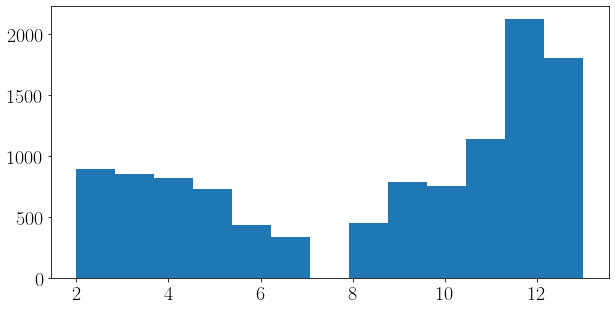

In [30]:
sectors=[]
for i in dupes:
    i = int(i)
    totals = seen[i]
    sectors.append(totals)

x=np.arange(len(sectors))
plt.figure(figsize=(10,5))
#plt.scatter(x,sectors,s=1)
plt.title('this is from camera4 only')

plt.hist(sectors,bins=13);#,histtype='bar');

In [31]:
for i in dupes[50:55]:
    print(i)

25153109
25153167
25153404
25153544
25153635


In [13]:
# seen2 = set()
# uniq_tics = []
# for x in dupes:
#     if x not in seen2:
#         uniq_tics.append(x)
#         seen2.add(x)
# print(len(uniq_tics))
tics_list = np.load('data/unique_cvz_tics.npy')
#tics_list = np.array([25153109,25153167,25153404,25153544,25153635])
cvzdupesagree=[]
for x in allsecs:
    #if x in tics_list:
    for i in tics_list:
        if x == i:
            cvzdupesagree.append(x)
print(len(cvzdupesagree))
    #print(x)
    #break

0


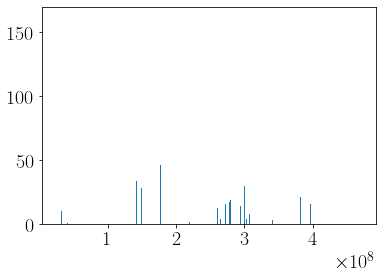

In [68]:
plt.hist(dupes,bins=11144);

In [29]:
#overlap of sec1 with sec 7
print(len(ticsec1))
s1s7_overlap =[]
for x in ticsec1:
    if x in ticsec7:
        s1s7_overlap.append(x)
print(len(s1s7_overlap))

#overlap of sec11 with sec7
print(len(ticsec11))
s11s7_overlap =[]
for x in ticsec11:
    if x in ticsec7:
        s11s7_overlap.append(x)
print(len(s11s7_overlap))

#overlap of secs 11/1/7
#print(len(ticsec11))
s11s1s7_overlap =[]
for x in s1s7_overlap:
    if x in s11s7_overlap:
        s11s1s7_overlap.append(x)
print(len(s11s1s7_overlap))

#overlap of sec 6 with sec 7

15899
5309
20000
6509
5102


In [33]:
# for i,tic in enumerate(s11s7_overlap):
#     if tic == sec11['col1'][i]:
#         print(sec11['col2'][i])
        
cam4=[]
cam3=[]
others=[]
for i,tic in enumerate(sec11['col1']):
    if tic in s11s7_overlap:
        cam = sec11['col2'][i]
        if cam == 4:
            cam4.append(cam)
        elif cam == 3:
            cam3.append(cam)
        else:
            others.append(cam)
print('4s:',len(cam4),'3s:',len(cam3),'others:',len(others))

4s: 6367 3s: 142 others: 0


In [28]:
tics_list = np.load('data/cool_cvz_tics.npy')

overlap2 =[]
for x in s11s7_overlap:
    if x in tics_list:
        overlap2.append(x)
print(len(overlap2))

0


/Users/helenfellow/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [79]:
#dont use this one but good if need to glance at data structure
sec1tics = open('/Users/helenfellow/Desktop/tesscurl_sector_1_lc.txt','r') #len = 15890
sec7tics = open('/Users/helenfellow/Desktop/all_targets_S007_v1.txt','r')
x=0
tot =[]
tots=[]
for line in sec1tics:
    tic = line[40:56]
    #print(tic)
    tot.append(tic)
sec1tics.close()
# for i in tot:
#     if 
for i in sec7tics:
    tots.append(i)
    print(i)
print(len(tots))
#     print(i[0:6])
#     row = i

    

#

# Full target list for orbit 21, sector 7

# Created Fri Jan 18 23:06:11 EST 2019 

# Concatenation of GI astero exo bright DDT ppas lists

#

# TICID	      Camera   CCD	Tmag	   RA		  Dec

   687046	2	3	14.02	119.5535	-16.3268

   687308	2	3	15.04	119.6417	-16.1779

   687627	2	3	13.24	119.5574	-15.9916

   687634	2	3	11.37	119.5563	-15.9881

   689318	2	3	 8.23	119.6067	-15.0217

   758285	2	3	 7.92	119.7163	-13.3159

   823128	2	3	 8.17	123.8517	-16.6438

   824169	2	3	15.26	123.8926	-15.8912

   827160	2	3	 4.87	123.8897	-13.6242

   828976	2	3	13.20	123.8292	-12.0923

   829147	2	3	 8.15	123.7944	-11.9309

   830161	2	3	13.22	123.9226	-12.7973

   832484	2	3	13.07	123.9605	-14.7167

   877333	2	3	 8.04	123.9218	-15.4009

   878056	2	3	13.88	123.9738	-15.9344

   879091	2	3	13.33	123.9573	-16.6246

   881177	2	3	14.44	123.9670	-17.4699

   889610	2	3	13.82	126.9995	-14.6349

   889858	2	3	14.31	127.1063	-14.3745

   890962	2	3	 8.38	127.0434	-13.2339

   925457	2	3	10.08	127.091

 54274896	2	3	14.89	118.3029	-16.3108

 54276701	2	3	13.49	118.2924	-15.5909

 54278540	2	3	13.65	118.2735	-14.7839

 54278621	2	3	15.02	118.2028	-14.7477

 54392330	2	3	13.37	118.4325	-15.2064

 54472983	2	3	13.38	118.5502	-16.7546

 54481678	2	3	15.34	118.4957	-12.8179

 54482039	2	3	11.95	118.5330	-12.6223

 54482221	2	3	15.50	118.4811	-12.5310

 54560077	2	3	11.83	118.5813	-13.2621

 54560307	2	3	15.21	118.5875	-13.3864

 54560542	2	3	 8.64	118.6291	-13.4961

 54562655	2	3	 8.09	118.5647	-14.5221

 54562709	2	3	14.63	118.6674	-14.5465

 54562865	2	3	14.47	118.6093	-14.6199

 54563155	2	3	13.10	118.6816	-14.7406

 54570892	2	3	15.45	118.6383	-17.9505

 54636377	2	3	13.28	118.7869	-14.7658

 54637745	2	3	13.37	118.7562	-14.1068

 54640442	2	3	12.31	118.7826	-12.8112

 54642667	2	3	 8.58	118.8249	-12.1854

 54696521	2	3	13.98	118.9333	-12.8573

 54698856	2	3	15.40	118.8544	-14.0409

 54702322	2	3	 6.17	118.8984	-15.5790

 54704250	2	3	13.22	118.8601	-16.4044

 54706082	2	3	13.83	118.9


127496097	2	2	14.08	117.0852	-25.3557

127572976	2	2	 8.37	117.1315	-24.4980

127574614	2	2	 4.72	117.2568	-24.9121

127579341	2	2	 8.18	117.2137	-26.0077

127644746	2	2	14.47	117.2398	-27.2848

127647189	2	2	 8.06	117.2042	-27.9540

127648462	2	2	14.41	117.2378	-28.3058

127652970	2	2	13.92	117.1479	-29.4870

127654691	2	2	14.43	117.3578	-29.9290

127737770	2	2	 8.09	117.2818	-28.7215

127740529	2	2	13.39	117.3255	-27.9830

127741066	2	2	 8.22	117.3722	-27.8340

127750290	2	2	14.28	117.2769	-25.5571

127751072	2	2	14.09	117.2649	-25.3750

127799216	2	2	 2.42	117.3236	-24.8597

127802942	2	2	14.92	117.4498	-24.0073

127811925	2	2	14.01	117.4884	-26.2261

127892113	2	2	12.40	117.5210	-27.5692

127975080	2	2	 4.71	117.5815	-27.9725

127979283	2	2	14.24	117.5958	-26.9316

127983336	2	2	14.88	117.5515	-25.9592

128050927	2	2	13.88	117.5441	-25.0006

128051828	2	2	15.42	117.5449	-24.7789

128052933	2	2	12.81	117.5675	-24.4886

128057162	2	2	13.74	117.6732	-24.4701

128139930	2	2	11.46	117.

156756455	3	2	 8.77	103.2102	-38.6527

156757827	3	2	11.13	103.2418	-37.0793

156757873	3	2	 8.07	103.2885	-37.0287

156758141	3	2	 8.17	103.2970	-36.7291

156758188	3	2	 8.76	103.2526	-36.6806

156758257	3	2	10.17	103.1948	-36.6047

156759031	3	2	10.28	103.3368	-36.1078

156806835	3	2	11.20	103.3692	-39.7619

156806967	3	2	15.09	103.3968	-39.9247

156807327	3	2	 8.75	103.3304	-40.3397

156807500	3	2	 9.83	103.3927	-40.5503

156807556	3	2	10.74	103.3804	-40.6153

156808736	3	2	 8.34	103.5200	-41.9324

156809363	3	2	10.57	103.4876	-41.1876

156810507	3	2	10.37	103.5349	-39.8911

156810780	3	2	 9.06	103.5493	-39.5946

156815683	3	2	 8.59	103.6608	-37.3190

156832130	3	3	 9.11	 98.4920	-46.4988

156833514	3	3	 9.85	 98.5086	-43.9078

156834113	3	3	13.04	 98.4887	-42.9109

156835509	3	3	 8.71	 98.6719	-43.4296

156836263	3	3	10.16	 98.7199	-44.7604

156836738	3	3	 8.03	 98.6154	-45.6160

156837222	3	3	 8.28	 98.6645	-46.5099

156841549	3	2	 8.03	103.7294	-37.9379

156842504	3	2	 8.23	103.7

238080172	3	4	 8.07	104.8520	-53.0515

238081051	3	4	 9.93	104.8101	-52.0331

238081343	3	4	 8.69	104.7593	-51.6921

238081678	3	4	10.83	104.8695	-51.3397

238082547	3	4	10.13	104.8683	-50.3465

238082652	3	4	 8.04	104.8693	-50.2340

238082714	3	4	 9.12	104.8639	-50.1600

238085851	3	4	10.45	105.0628	-48.7237

238086647	3	4	 8.44	104.9591	-49.5076

238087145	3	4	11.41	105.0993	-50.0088

238087238	3	4	10.88	105.0947	-50.0939

238087618	3	4	 9.38	104.9367	-50.5632

238089812	3	4	10.85	105.0372	-53.1006

238090983	3	4	 9.81	105.2827	-53.2306

238091193	3	4	 9.62	105.1768	-52.9339

238091829	3	4	10.36	105.2600	-52.1596

238091935	3	4	 8.38	105.2501	-52.0373

238091951	3	4	14.47	105.2108	-52.0157

238092294	3	4	10.68	105.2060	-51.6373

238092498	3	4	 3.40	105.2144	-51.4025

238092738	3	4	 8.81	105.2347	-51.1161

238093257	3	4	10.45	105.1870	-50.5846

238093924	3	4	10.48	105.1953	-49.8624

238094180	3	4	 9.97	105.1812	-49.6114

238097100	3	4	 9.97	105.4311	-49.0963

238098901	3	4	 9.43	105.2


285216601	3	4	 8.07	119.9372	-46.9030

285412836	3	1	 5.43	120.0813	-45.4569

285413207	3	1	 9.92	120.0927	-45.3187

285524464	3	1	 9.23	120.1415	-42.9119

285916305	3	4	 6.94	119.7530	-48.3763

287154097	4	4	13.74	118.2247	-78.2332

287154823	4	4	 8.61	118.0273	-79.2993

287155827	4	4	 9.93	118.2120	-81.1845

287273024	4	1	 7.43	109.4130	-59.2620

287274194	4	1	10.40	109.5296	-57.7706

287298304	4	3	 9.55	 82.4433	-66.0415

287298969	4	3	 7.88	 82.3553	-66.4390

287299191	4	3	11.48	 82.5226	-66.5578

287323299	3	4	 9.45	109.3839	-54.9169

287323695	3	4	 8.71	109.4282	-54.4991

287323812	3	4	10.86	109.4594	-54.3826

287324868	3	4	 8.92	109.6062	-54.5197

287325372	3	4	 8.72	109.7125	-55.0498

287325966	3	4	 9.54	109.6888	-55.6813

287326187	3	4	11.84	109.5883	-55.9042

287326696	3	4	10.29	109.7313	-56.4236

287326881	3	4	11.48	109.7645	-56.6270

287326892	3	4	13.91	109.7329	-56.6371

287326898	3	4	 8.19	109.7045	-56.6436

287328069	4	1	10.83	109.5900	-57.9467

287328454	4	1	12.03	109.

349411936	4	1	10.13	110.6131	-60.3708

349412213	4	1	 9.18	110.8017	-60.7142

349412453	4	1	 9.18	110.7682	-60.9797

349413295	4	1	 9.80	110.7348	-62.0088

349413469	4	1	10.23	110.6097	-62.2138

349414249	2	3	13.16	114.5421	-20.2386

349415028	2	3	14.28	114.5255	-20.4944

349415561	2	3	13.80	114.5398	-20.6667

349419996	2	2	 9.71	114.5344	-21.8987

349420895	2	2	14.23	114.5219	-22.1577

349477633	4	1	 9.41	110.6132	-62.8306

349478970	4	1	 8.59	110.7299	-64.6329

349480480	4	1	 9.47	110.8326	-65.0545

349480507	4	1	 9.43	110.9364	-65.0107

349480752	4	1	 8.03	110.8602	-64.6920

349481594	4	1	11.50	110.9362	-63.5810

349482072	4	1	11.43	110.9755	-62.9215

349482432	4	1	10.81	110.8953	-62.4461

349483715	4	1	 7.95	110.9826	-60.8378

349484401	4	1	 9.94	110.8373	-60.1013

349484523	4	1	10.24	110.9287	-59.9712

349484595	4	1	 9.52	111.2382	-59.9320

349484636	4	1	10.90	111.2789	-60.0018

349484930	4	1	10.92	111.2682	-60.3848

349485031	4	1	 8.55	111.0572	-60.4993

349517828	4	1	11.61	111.0


443888888	1	3	10.92	121.8901	  8.1822

443889131	1	3	 9.65	121.8747	  7.7924

443890554	1	3	10.27	122.0520	  6.3703

443891444	1	3	 8.21	121.9606	  7.7185

443892394	1	3	 9.33	122.0441	  9.1746

443894401	1	3	 8.22	122.1530	 11.2319

443894764	1	3	 8.88	122.1908	 10.6090

443894813	1	3	 8.16	122.1296	 10.5271

443895815	1	3	12.69	122.1037	  8.8144

443896025	1	3	10.44	122.0934	  8.4799

443898996	1	3	 7.31	122.2544	  8.0395

443899993	1	3	 9.20	122.3032	  9.6877

443900456	1	3	 8.07	122.2693	 10.5097

443901255	1	3	 8.96	122.2614	 11.9371

443901285	1	3	 7.32	122.3845	  5.9264

443901848	1	3	12.86	122.4264	  6.8410

443902823	1	3	13.35	122.4229	  8.3794

443903093	1	3	10.99	122.3329	  8.8497

443904445	1	3	17.24	122.4182	 11.2073

443905123	1	3	10.52	122.4894	 11.4685

443905187	1	3	10.70	122.4807	 11.3483

443906058	1	3	 9.82	122.4698	  9.8193

443909700	1	3	 8.80	122.6651	  7.8164

443910815	1	3	 9.92	122.5860	  9.5876

443912135	1	3	 8.94	122.6076	 11.8044

443950508	1	3	 8.70	123.

# running starspot from cleaned lcs (skip prep step)

In [50]:
#importing tic list
tics_list = np.load('data/unique_cvz_tics.npy')
print(tics_list[0:2])

['177254872' '142143115']


In [51]:


#to store calculated stats
ls_list = []
acf_list = []
rvar = []
rvar_orig = []
tic_list = [] #to verify picking order stays same

#opening cleaned lcfiles
for tic in tics_list[0:2]:
    print(tic)
    lc = fits.open('data/cleaned_LightCurves/{}/lc.fits'.format(tic)) #lk cant find flux attribute
    data = lc[1].data #all the data
    flux1 = data['FLUX']
    flux_err1 = data['FLUX_ERR']
    time1 = data['TIME']
    cadence = data['CADENCENO']
    quality = data['QUALITY']
#extra cleaning- ruths tutorial
    # Calculate the median so that we can median-normalize.
    med = np.median(flux1)
    # Do an initial sigma clip to remove big outliers.
    m = sigma_clipping.sigma_clip(flux1/med - 1, nsigma=5)
    x, y, yerr = time1[m], flux1[m]/med - 1, flux_err1[m]/med

    # Then a sigma clip using a Sav-Gol filter for smoothing
    smooth, mask = sigma_clipping.filter_sigma_clip(x, y, window_length=199)
    time, flux, flux_err = x[mask], y[mask], yerr[mask]
    
    
    
    #calculating/saving stats & closing files
    #rvar (intrinsic)
    R_var = np.percentile(flux, 95) - np.percentile(flux, 5)
    rvar.append(R_var)
    np.save('data/rvar_smoothed',rvar)
    R_var2 = np.percentile(flux1, 95) - np.percentile(flux1, 5)
    rvar_orig.append(R_var2)
    np.save('data/rvar_original',rvar_orig)
    print('checking rvar diff:',R_var,R_var2)
    
    #creating model
    rotate = ss.RotationModel(time, flux, flux_err)
    
    #ls 
    lomb_scargle_period = rotate.ls_rotation()
    ls_list.append(lomb_scargle_period)
    np.save('data/ls_periods', ls_list)
    print('ls-rp:',lomb_scargle_period)
    power = rotate.power
    freq = rotate.freq
    ps = 1./freq
    peaks = np.array([i for i in range(1, len(ps)-1) if power[i-1] < \
                  power[i] and power[i+1] < power[i]])
    top_power_of_orderedpeaks = np.sort(power[peaks]) #orders power values based on peak indices lowest to highest
    #maxpower = max(power[peaks])
    #print('TESTS:')
    #print(len(power),len(peaks),type(power),type(peaks),np.shape(power),np.shape(peaks),power,peaks)
    first_powerpeak = top_power_of_orderedpeaks[-1] #think only want this amplitude
    second_powerpeak = top_power_of_orderedpeaks[-2]
    third_powerpeak = top_power_of_orderedpeaks[-3]
    first_rp = ps[power == first_powerpeak][0]
    second_rp = ps[power == second_powerpeak][0]
    third_rp = ps[power == third_powerpeak][0]
    print(first_rp,second_rp,third_rp)

    
    #acf 
    acf_period = rotate.acf_rotation(interval= 'TESS')#=np.diff(time)[0])
    print('acf-rp:',acf_period)
    x = rotate.lags
    y = rotate.acf
    peaks = np.array([i for i in range(1, len(y)-1) if y[i-1] < y[i] and y[i+1] < y[i]])
    x_peaks = x[peaks]
    y_peaks = y[peaks]
    inds = np.argsort(y_peaks)
    xpeaks = x_peaks[inds][::-1]
    acfrp1 = xpeaks[0]
    acfrp2 = xpeaks[1]
    acfrp3 = xpeaks[2]
    print('acf one:',acfrp1,'two:',acfrp2,'three:',acfrp2)
    acf_list.append(acf_period)
    np.save('data/acf_periods',acf_list)
    
    
    #tic order
    tic_list.append(tic)
    np.save('data/tic_order',tic_list)
    lc.close()


177254872
checking rvar diff: 0.009904012084007263 0.010048496723175204
ls-rp: 6.766335789537788
TESTS:
100000 454 <class 'numpy.ndarray'> <class 'numpy.ndarray'> (100000,) (454,) [3.94812493e-05 3.93111538e-05 3.91628846e-05 ... 3.00396660e-06
 2.93063546e-06 2.85628956e-06] [  152   457   663   882  1106  1410  1632  1834  2102  2341  2523  2724
  2952  3103  3282  3462  3602  3777  3945  4082  4294  4513  4708  4878
  5395  5988  6143  6454  6617  6866  7062  7584  7819  8067  8274  8448
  8670  8848  9023  9183  9340  9574  9752  9919 10219 10506 10793 10986
 11122 11547 11698 11916 12244 12438 12764 12975 13297 13507 13671 13860
 14008 14180 14405 14585 14763 15175 15493 15827 16075 16252 16396 16529
 16715 16897 17126 17270 17482 17681 17937 18118 18375 18571 18677 18978
 19261 19399 19554 19718 19891 20143 20324 20488 20794 20941 21118 21393
 21599 21842 22020 22149 22355 22626 22913 23251 23484 23681 23794 24036
 24244 24564 24718 24949 25187 25303 25563 25763 25959 26342 26509

Text(0.5, 1.0, 'Original')

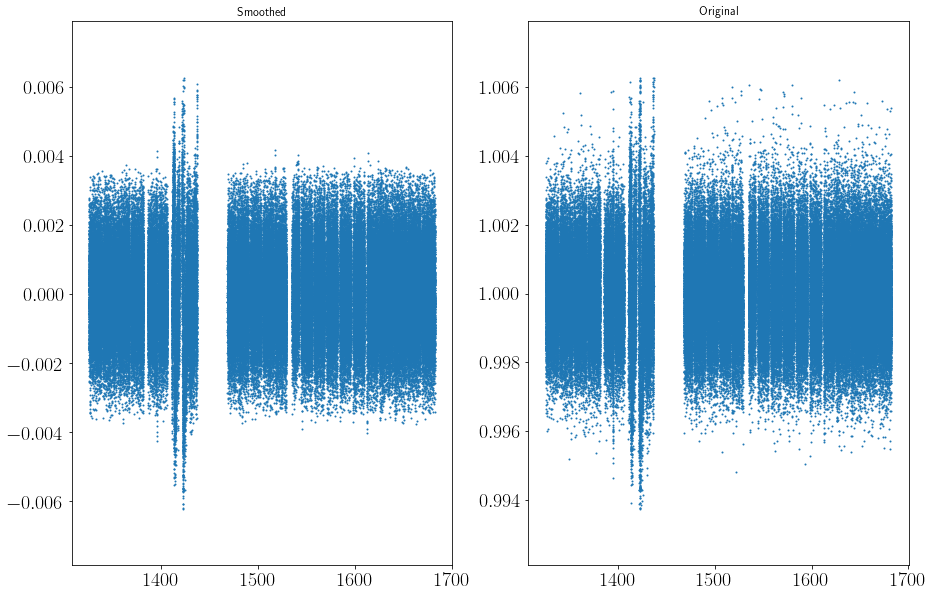

In [6]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.scatter(time,flux,s=1)
ax1.set_title('Smoothed')
ax2.scatter(time1,flux1,s=1)
ax2.set_title('Original')

In [39]:
amp1=y_peaks[0]
amp2 = y_peaks[1]
amp3=y_peaks[2]

for count,i in enumerate(x_peaks):
    print(count,i)

0 0.0694445
1 0.78055618
2 1.0000008
3 1.05694529
4 1.0972231000000001
5 1.10416755
6 1.2916677
7 1.29722326
8 1.8888904
9 1.9861127
10 1.9944460400000001
11 2.00277938
12 2.0069460500000003
13 2.01250161
14 2.02361273
15 2.08194611
16 2.09305723
17 2.1347239300000003
18 2.15139061
19 2.16111284
20 2.16527951
21 2.16944618
22 2.17639063
23 2.18889064
24 2.19166842
25 2.19722398
26 2.20694621
27 2.21111288
28 2.21805733
29 2.222224
30 2.23333512
31 2.24722402
32 2.26805737
33 2.29722406
34 2.30972407
35 2.32083519
36 2.34166854
37 2.36389078
38 2.3722241200000003
39 2.43333528
40 2.52639091
41 2.65000212
42 2.65416879
43 2.67500214
44 2.67777992
45 2.7013910500000002
46 2.71389106
47 2.72777996
48 2.74166886
49 2.74583553
50 2.74861331
51 2.75833554
52 2.77361333
53 2.78611334
54 2.8055578
55 2.81666892
56 2.82083559
57 2.82778004
58 2.83611338
59 2.84028005
60 2.84583561
61 2.85278006
62 2.9069467700000002
63 2.916669
64 2.93472457
65 2.94166902
66 2.95139125
67 2.96805793
68 2.9750023

1755 37.17641863
1756 37.18197419
1757 37.18614086
1758 37.188918640000004
1759 37.19308531
1760 37.19864087
1761 37.20280754
1762 37.20697421
1763 37.20975199
1764 37.21947422
1765 37.22364089
1766 37.22641867
1767 37.23336312
1768 37.24308535
1769 37.2500298
1770 37.25836314
1771 37.26808537
1772 37.27364093
1773 37.279196490000004
1774 37.28475205
1775 37.287529830000004
1776 37.29447428
1777 37.29864095
1778 37.31669652
1779 37.320863190000004
1780 37.32502986
1781 37.32780764
1782 37.33475209
1783 37.337529870000004
1784 37.34169654
1785 37.354196550000005
1786 37.35697433
1787 37.35975211
1788 37.362529890000005
1789 37.369474340000004
1790 37.37919657
1791 37.38197435
1792 37.386141020000004
1793 37.3889188
1794 37.39169658
1795 37.39864103
1796 37.40836326
1797 37.4166966
1798 37.419474380000004
1799 37.4305855
1800 37.436141060000004
1801 37.44169662
1802 37.444474400000004
1803 37.45002996
1804 37.452807740000004
1805 37.45975219
1806 37.46669664
1807 37.469474420000004
1808 

3617 51.3194855
3618 51.34448552
3619 51.350041080000004
3620 51.35281886
3621 51.35698553
3622 51.35976331
3623 51.36531887
3624 51.37642999
3625 51.38754111
3626 51.39031889
3627 51.40143001
3628 51.40559668
3629 51.41393002
3630 51.416707800000005
3631 51.42087447
3632 51.42643003
3633 51.433374480000005
3634 51.43615226
3635 51.441707820000005
3636 51.44587449
3637 51.45420783
3638 51.458374500000005
3639 51.465318950000004
3640 51.48059674
3641 51.4861523
3642 51.48893008
3643 51.49170786
3644 51.49587453
3645 51.5000412
3646 51.50976343
3647 51.51254121
3648 51.515318990000004
3649 51.51948566
3650 51.523652330000004
3651 51.53059678
3652 51.53337456
3653 51.56115236
3654 51.572263480000004
3655 51.590319050000005
3656 51.59309683
3657 51.597263500000004
3658 51.60420795
3659 51.60837462
3660 51.61254129
3661 51.61948574
3662 51.6250413
3663 51.630596860000004
3664 51.63754131
3665 51.64031909
3666 51.64309687
3667 51.64587465
3668 51.64865243
3669 51.65143021
3670 51.65559688000

5546 66.23755299
5547 66.24588633
5548 66.25838634
5549 66.26255301
5550 66.26949746
5551 66.27227524
5552 66.28060858
5553 66.28338636000001
5554 66.28755303
5555 66.29310859
5556 66.29866415000001
5557 66.30144193
5558 66.30699749
5559 66.31116416
5560 66.32088639
5561 66.33060862
5562 66.33894196
5563 66.34171974
5564 66.34588641
5565 66.35144197
5566 66.35838642
5567 66.3611642
5568 66.37088643
5569 66.37783088
5570 66.388942
5571 66.39310867
5572 66.39727534000001
5573 66.4028309
5574 66.40560868
5575 66.41255313
5576 66.41533091000001
5577 66.41949758
5578 66.42227536
5579 66.43199759000001
5580 66.43755315
5581 66.44727538000001
5582 66.45421983
5583 66.4583865
5584 66.46533095000001
5585 66.47366429
5586 66.4861643
5587 66.49727542000001
5588 66.51116432
5589 66.51949766
5590 66.52644211
5591 66.52921989000001
5592 66.53199767
5593 66.5417199
5594 66.54449768
5595 66.55421991
5596 66.58894216
5597 66.59310883
5598 66.59866439
5599 66.60144217
5600 66.60560884
5601 66.6125532900

7439 80.29728646000001
7440 80.30700869
7441 80.30978647
7442 80.31534203
7443 80.31811981
7444 80.32506426
7445 80.33061982000001
7446 80.33617538
7447 80.34034205
7448 80.36673096
7449 80.37228652
7450 80.3750643
7451 80.38061986
7452 80.38339764
7453 80.38617542
7454 80.3889532
7455 80.4028421
7456 80.40700877
7457 80.41256433000001
7458 80.42506434
7459 80.43339768
7460 80.43756435
7461 80.44034213
7462 80.45145325
7463 80.45423103
7464 80.45700881
7465 80.46534215
7466 80.47506438
7467 80.48756439
7468 80.50423107
7469 80.51534219
7470 80.51950886
7471 80.52228664
7472 80.52784220000001
7473 80.53617554
7474 80.54450888000001
7475 80.55284222
7476 80.56812001
7477 80.57367557
7478 80.58617558
7479 80.58895336
7480 80.59312003000001
7481 80.59867559
7482 80.61673116
7483 80.62367561
7484 80.62645339000001
7485 80.63062006
7486 80.64034229
7487 80.64450896
7488 80.65423119
7489 80.68895344
7490 80.69867567
7491 80.70145345
7492 80.70700901000001
7493 80.71395346
7494 80.73062014
749

9151 92.08340700000001
9152 92.11257369
9153 92.1250737
9154 92.12924037
9155 92.13618482
9156 92.14312927
9157 92.15007372000001
9158 92.15701817
9159 92.16674040000001
9160 92.17368485
9161 92.17924041
9162 92.18479597
9163 92.18757375
9164 92.19174042
9165 92.1945182
9166 92.20424043
9167 92.20979599
9168 92.21257377
9169 92.21812933
9170 92.2361849
9171 92.24035157
9172 92.24451824
9173 92.24729602000001
9174 92.25701825
9175 92.26535159000001
9176 92.27090715
9177 92.27646271
9178 92.27924049
9179 92.28340716000001
9180 92.28618494
9181 92.28896272
9182 92.2917405
9183 92.30146273
9184 92.30701829
9185 92.31674052
9186 92.32368497
9187 92.32785164
9188 92.3334072
9189 92.34035165
9190 92.34312943
9191 92.34729610000001
9192 92.35285166
9193 92.35840722
9194 92.36257389000001
9195 92.36535167000001
9196 92.36951834
9197 92.38340724
9198 92.39035169
9199 92.39590725000001
9200 92.39868503000001
9201 92.40146281
9202 92.40562948
9203 92.40979615
9204 92.41257393000001
9205 92.4181294

10159 99.21257937
10160 99.21674604
10161 99.22369049000001
10162 99.23202383
10163 99.23480161
10164 99.24452384
10165 99.24730162
10166 99.25285718
10167 99.25702385000001
10168 99.2639683
10169 99.26674608
10170 99.26952386
10171 99.27230164000001
10172 99.27924609
10173 99.29452388
10174 99.29730166
10175 99.30146833
10176 99.30702389
10177 99.31257945
10178 99.32091279000001
10179 99.32507946
10180 99.32924613
10181 99.3334128
10182 99.34869059
10183 99.35146837
10184 99.35702393
10185 99.36396838
10186 99.36674616
10187 99.37785728
10188 99.39313507
10189 99.41396842
10190 99.42646843
10191 99.44313511
10192 99.44730178
10193 99.45285734000001
10194 99.45702401
10195 99.46396846
10196 99.47091291000001
10197 99.47785736
10198 99.49591293
10199 99.5000796
10200 99.50285738000001
10201 99.50980183
10202 99.51813517000001
10203 99.52091295000001
10204 99.52924629
10205 99.5417463
10206 99.54730186
10207 99.55424631
10208 99.56119076
10209 99.57230188
10210 99.58202411
10211 99.58619

12003 112.92786812
12004 112.93203479
12005 112.93897924000001
12006 112.94175702
12007 112.94592369
12008 112.95009036
12009 112.96120148
12010 112.97092371000001
12011 112.97370149000001
12012 112.97647927
12013 112.98897928000001
12014 112.99731262
12015 113.00286818000001
12016 113.00842374
12017 113.01536819
12018 113.01953486000001
12019 113.02231264000001
12020 113.02509042
12021 113.03203487
12022 113.03897932000001
12023 113.06259045
12024 113.08897936000001
12025 113.09314603
12026 113.10703493
12027 113.11675716
12028 113.12231272000001
12029 113.1250905
12030 113.13342384
12031 113.13759051000001
12032 113.14314607
12033 113.15009052
12034 113.15981275
12035 113.16397942
12036 113.17231276
12037 113.17786832
12038 113.18203499
12039 113.19175722
12040 113.19592389
12041 113.19870167
12042 113.20425723000001
12043 113.2084239
12044 113.21120168
12045 113.21953502000001
12046 113.22509058
12047 113.23064614
12048 113.24175726
12049 113.24731282
12050 113.25009060000001
12051 

13655 124.91815549
13656 124.92926661
13657 124.93343328
13658 124.93759995
13659 124.94176662000001
13660 124.94593329
13661 124.97648887
13662 124.98065554
13663 124.99037777000001
13664 124.99593333
13665 125.01260001
13666 125.01537779
13667 125.02232224000001
13668 125.0278778
13669 125.03065558
13670 125.04037781000001
13671 125.04593337
13672 125.05426671000001
13673 125.05982227
13674 125.06537783
13675 125.06815561
13676 125.09037785000001
13677 125.10565564000001
13678 125.11260009
13679 125.11676676
13680 125.11954454
13681 125.12232232000001
13682 125.12648899
13683 125.12926677
13684 125.13204455
13685 125.13760011000001
13686 125.14454456
13687 125.14871123
13688 125.15148901
13689 125.15426679000001
13690 125.16121124
13691 125.1667668
13692 125.17232236000001
13693 125.17648903
13694 125.17926681
13695 125.18760015000001
13696 125.19871127
13697 125.20426683000001
13698 125.2084335
13699 125.21121128
13700 125.21815573
13701 125.22232240000001
13702 125.25843354
13703 1

15496 139.05150013
15497 139.05983347
15498 139.06538903
15499 139.07511126
15500 139.08483349
15501 139.08761127
15502 139.09038905
15503 139.09594461
15504 139.10288906
15505 139.10566684
15506 139.10844462
15507 139.11955574
15508 139.13066686
15509 139.13483353
15510 139.13761131
15511 139.14038909
15512 139.14316687000002
15513 139.14733354
15514 139.15566688
15515 139.16122244000002
15516 139.16816689
15517 139.17233356
15518 139.17650023000002
15519 139.18483357
15520 139.18900024
15521 139.19316691
15522 139.19733358
15523 139.2084447
15524 139.21122248
15525 139.21677804
15526 139.22094471
15527 139.22372249
15528 139.22650027
15529 139.23066694
15530 139.24177806
15531 139.26122252000002
15532 139.26955586
15533 139.27372253000001
15534 139.27650031000002
15535 139.28066698
15536 139.28344476
15537 139.29594477
15538 139.30150033
15539 139.30705589000002
15540 139.31122256
15541 139.32094479
15542 139.32788924000002
15543 139.33066702
15544 139.3334448
15545 139.33761147
1554

17338 152.5556776
17339 152.55845538
17340 152.56123316
17341 152.56401094
17342 152.56678872
17343 152.57095539
17344 152.57512206
17345 152.57928873
17346 152.58762207
17347 152.59039985
17348 152.59317763
17349 152.59595541000002
17350 152.59873319000002
17351 152.60428875
17352 152.60706653
17353 152.60984431
17354 152.61401098000002
17355 152.62095543
17356 152.62373321
17357 152.62651099
17358 152.63484433
17359 152.64039989
17360 152.64456656000002
17361 152.65012212
17362 152.6528999
17363 152.65845546
17364 152.66262213000002
17365 152.66956658
17366 152.67651103
17367 152.68484437
17368 152.69734438
17369 152.70289994
17370 152.70984439
17371 152.71539995
17372 152.72095551
17373 152.72651107000002
17374 152.73206663
17375 152.73762219
17376 152.74317775
17377 152.74873331
17378 152.75289998
17379 152.75567776
17380 152.75984443000002
17381 152.76539999
17382 152.76817777
17383 152.78067778000002
17384 152.78901112
17385 152.80151113
17386 152.80706669
17387 152.81262225
1738

19072 164.45985379
19073 164.46402046
19074 164.46679824
19075 164.4723538
19076 164.47790936
19077 164.48763159
19078 164.49596493
19079 164.50429827
19080 164.51402050000002
19081 164.51957606
19082 164.52235384
19083 164.52652051
19084 164.53207607000002
19085 164.53763163
19086 164.5417983
19087 164.55152053
19088 164.55985387
19089 164.57096499
19090 164.57374277
19091 164.57652055
19092 164.58624278
19093 164.59040945
19094 164.59457612
19095 164.60568724
19096 164.61402058000002
19097 164.62096503
19098 164.62374281
19099 164.62652059
19100 164.63068726
19101 164.63346504
19102 164.6390206
19103 164.64457616
19104 164.65013172000002
19105 164.66957618
19106 164.67790952000001
19107 164.68346508000002
19108 164.69318731
19109 164.70152065
19110 164.70429843
19111 164.71540955
19112 164.72096511
19113 164.72513178
19114 164.73485401
19115 164.73763179
19116 164.74596513
19117 164.74874291
19118 164.75290958
19119 164.75707625
19120 164.76263181000002
19121 164.76679848
19122 164.7

20826 177.0695861
20827 177.07236388
20828 177.07930833
20829 177.08208611
20830 177.09041945
20831 177.09458612
20832 177.09875279
20833 177.10569724
20834 177.10847502000001
20835 177.11125280000002
20836 177.1390306
20837 177.15708617
20838 177.18625286
20839 177.1945862
20840 177.20014176
20841 177.21403066
20842 177.22375289000001
20843 177.23347512
20844 177.23903068
20845 177.25153069
20846 177.25430847
20847 177.25986403000002
20848 177.26264181000002
20849 177.26541959
20850 177.26958626
20851 177.27514182000002
20852 177.30986407
20853 177.31819741
20854 177.32097519
20855 177.32514186
20856 177.33208631
20857 177.33764187
20858 177.34041965
20859 177.34597521
20860 177.35430855
20861 177.35847522
20862 177.36264189
20863 177.36541967
20864 177.37236412000001
20865 177.37514190000002
20866 177.38625302
20867 177.39041969000002
20868 177.4029197
20869 177.40708637
20870 177.41541971
20871 177.42097527
20872 177.42514194
20873 177.42930861
20874 177.43347528
20875 177.43625306


(-0.5, 50)

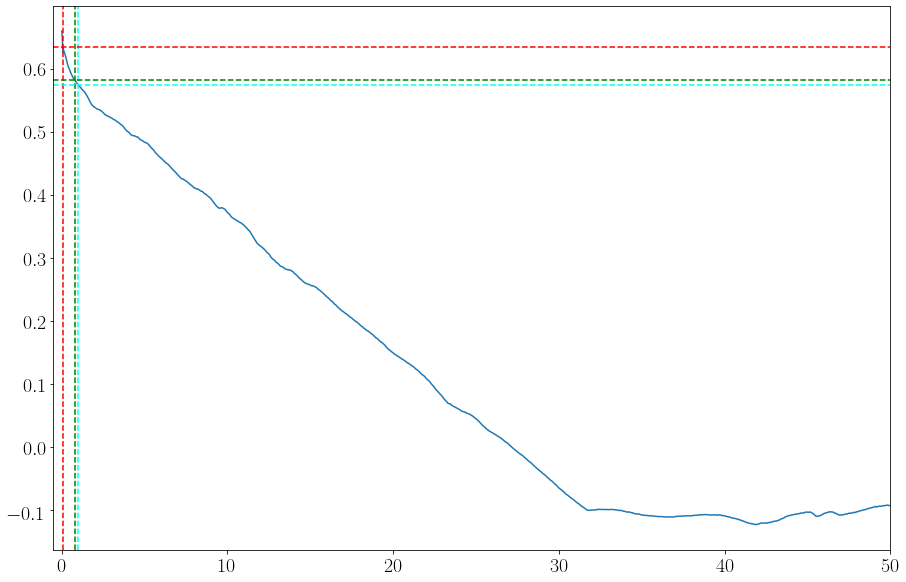

In [40]:
#ls
# plt.plot(1./freq,power)
# plt.axvline(first_rp,linestyle='--',c='r')
# plt.axvline(second_rp,linestyle='--',c='r')
# plt.axvline(third_rp,linestyle='--',c='r')



#acf
plt.figure(figsize=(15,10))
plt.plot(x,y)
plt.axvline(acfrp1,linestyle='--',c='r')
plt.axvline(acfrp2,linestyle='--',c='g')
plt.axvline(acfrp3,linestyle='--',c='cyan')
plt.axhline(amp1,linestyle='--',c='r')
plt.axhline(amp2,linestyle='--',c='g')
plt.axhline(amp3,linestyle='--',c='cyan')
plt.xlim(-0.5,50)

# plt.ylim(0.5,0.7)
# plt.xlim(-0.1,1.5)

RPs: 7.562722062647191 8.0754415291809 7.084289722009691


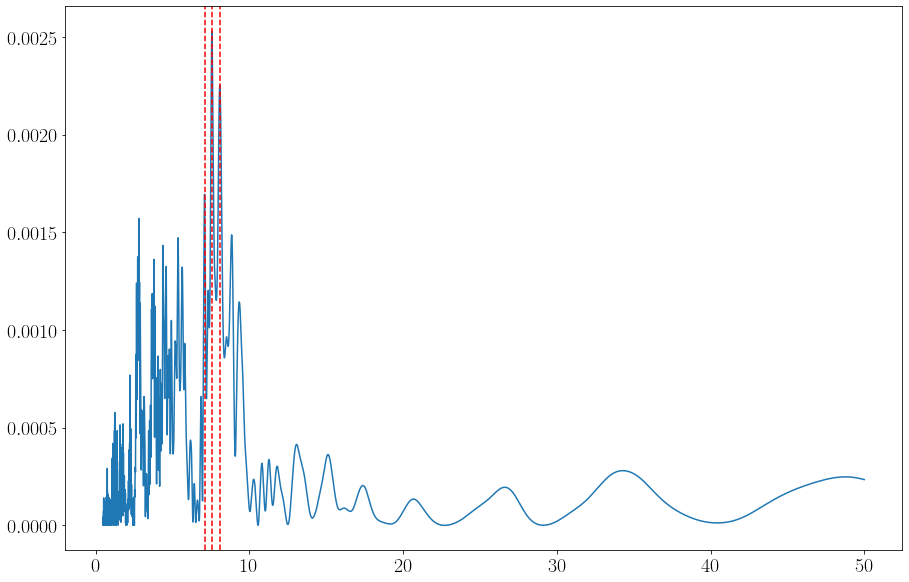

In [15]:
#ls
plt.figure(figsize=(15,10))
plt.plot(1./freq,power)
plt.axvline(first_rp,linestyle='--',c='r')
plt.axvline(second_rp,linestyle='--',c='r')
plt.axvline(third_rp,linestyle='--',c='r')
print('RPs:',first_rp,second_rp,third_rp)

8.597591e-06


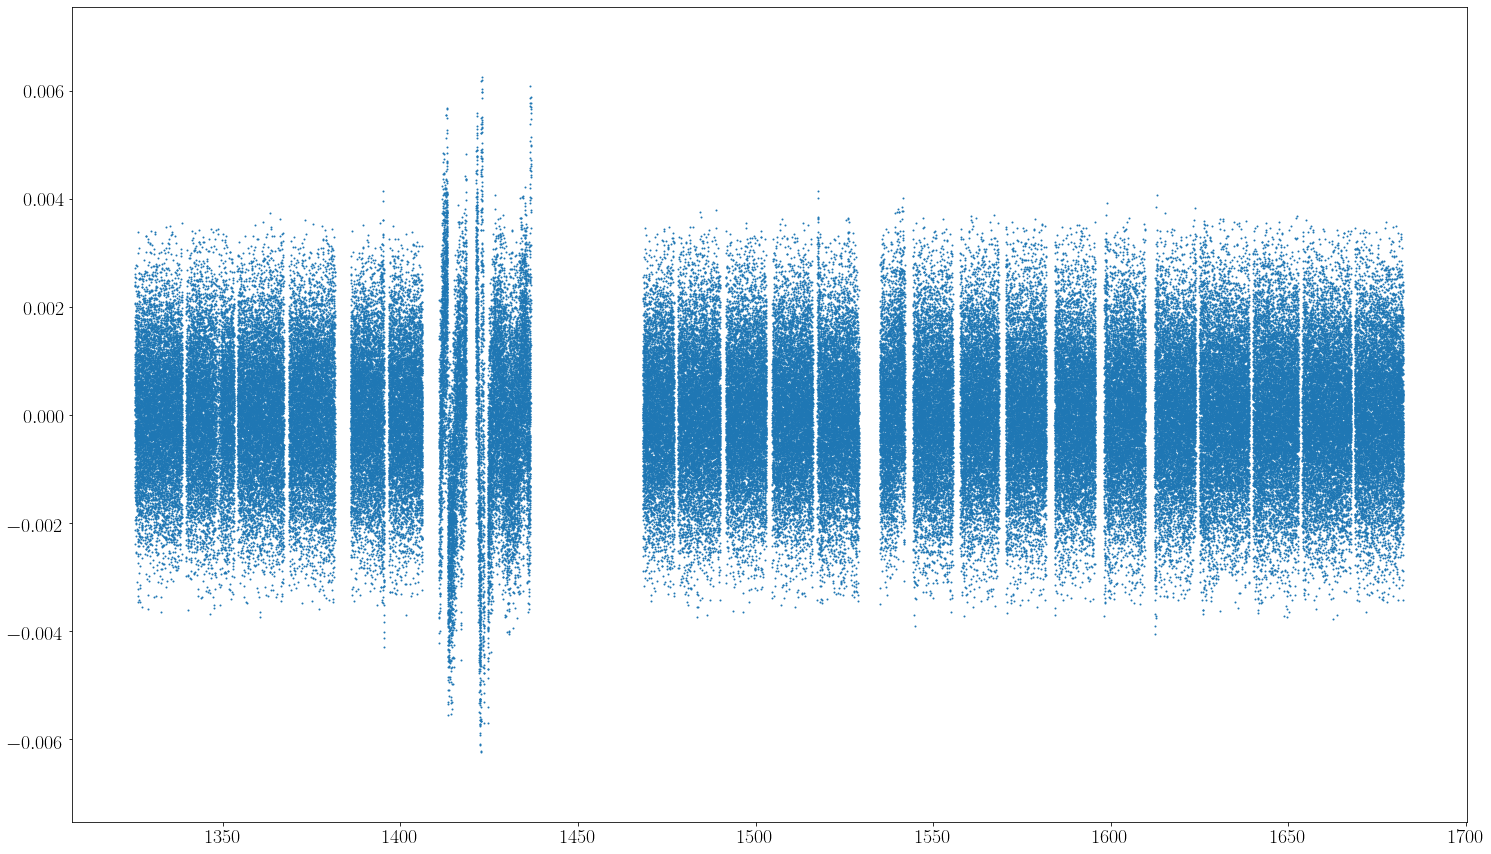

In [182]:
plt.figure(figsize=(25,15))
plt.scatter(time,flux,s=1)
#plt.xlim(np.min(time1),1400)
#plt.ylim(-.004,.004)
print(np.mean(flux))

1.0000154


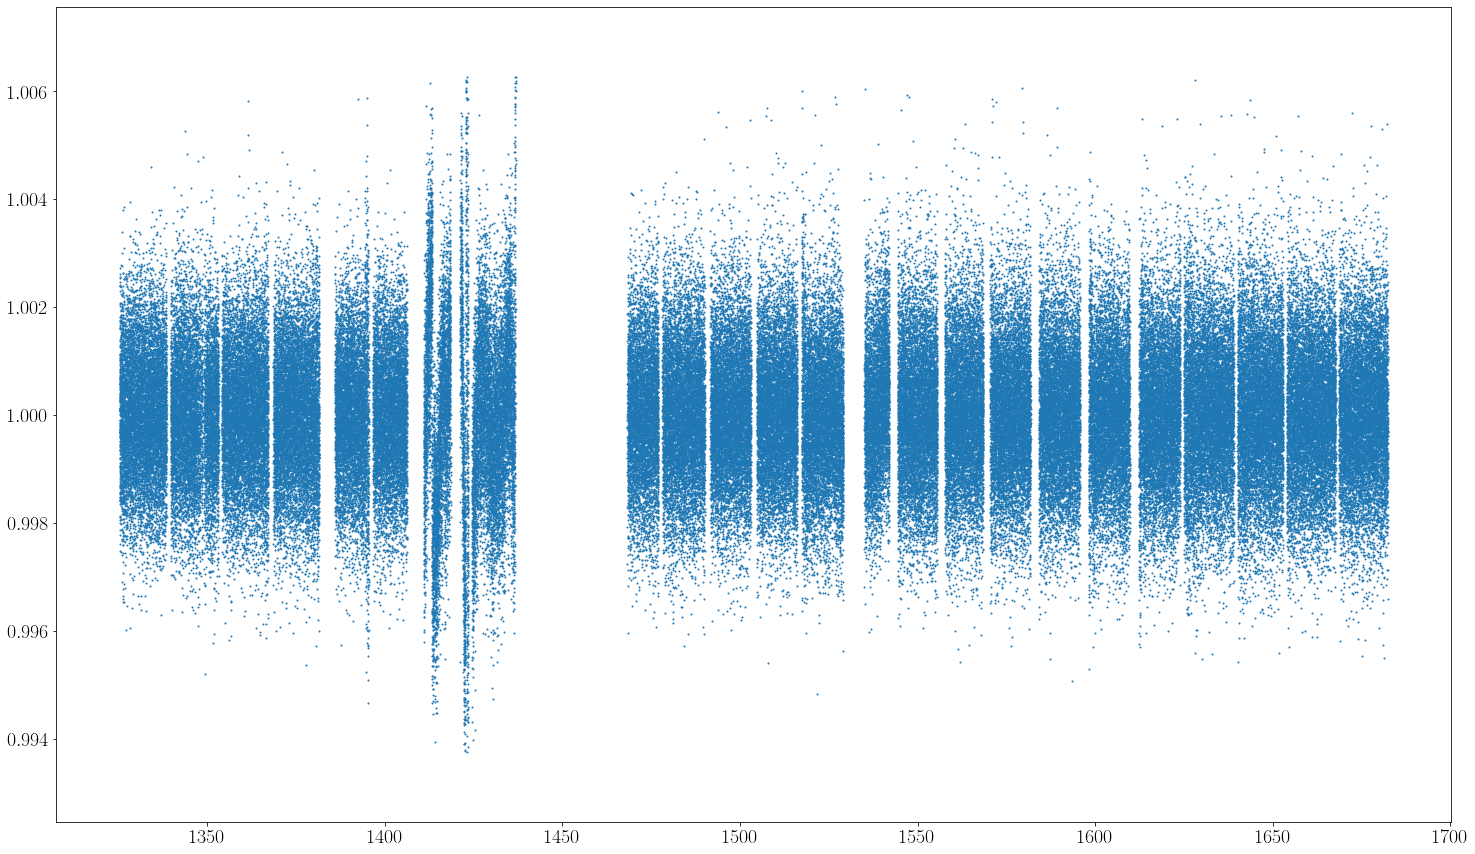

In [186]:
plt.figure(figsize=(25,15))
plt.scatter(time1,flux1,s=1)
#plt.xlim(np.min(time1),1400)
#plt.ylim(-.004,.004)
print(np.mean(flux1))

In [110]:
time

array([1325.29611677, 1325.29750564, 1325.29889451, ..., 1682.35438142,
       1682.35577029, 1682.35715916])

In [111]:
np.diff(time)[0]

0.0013888727276025747

In [109]:
print(rvar,ls_list,acf_list,tic_list)

[0.009904012084007263, 0.004004806280136108] [6.766335789537788, 7.562722062647191] [0.07083229536920044, 0.06944363638012874] ['177254872', '142143115'] ['177254872', '142143115']


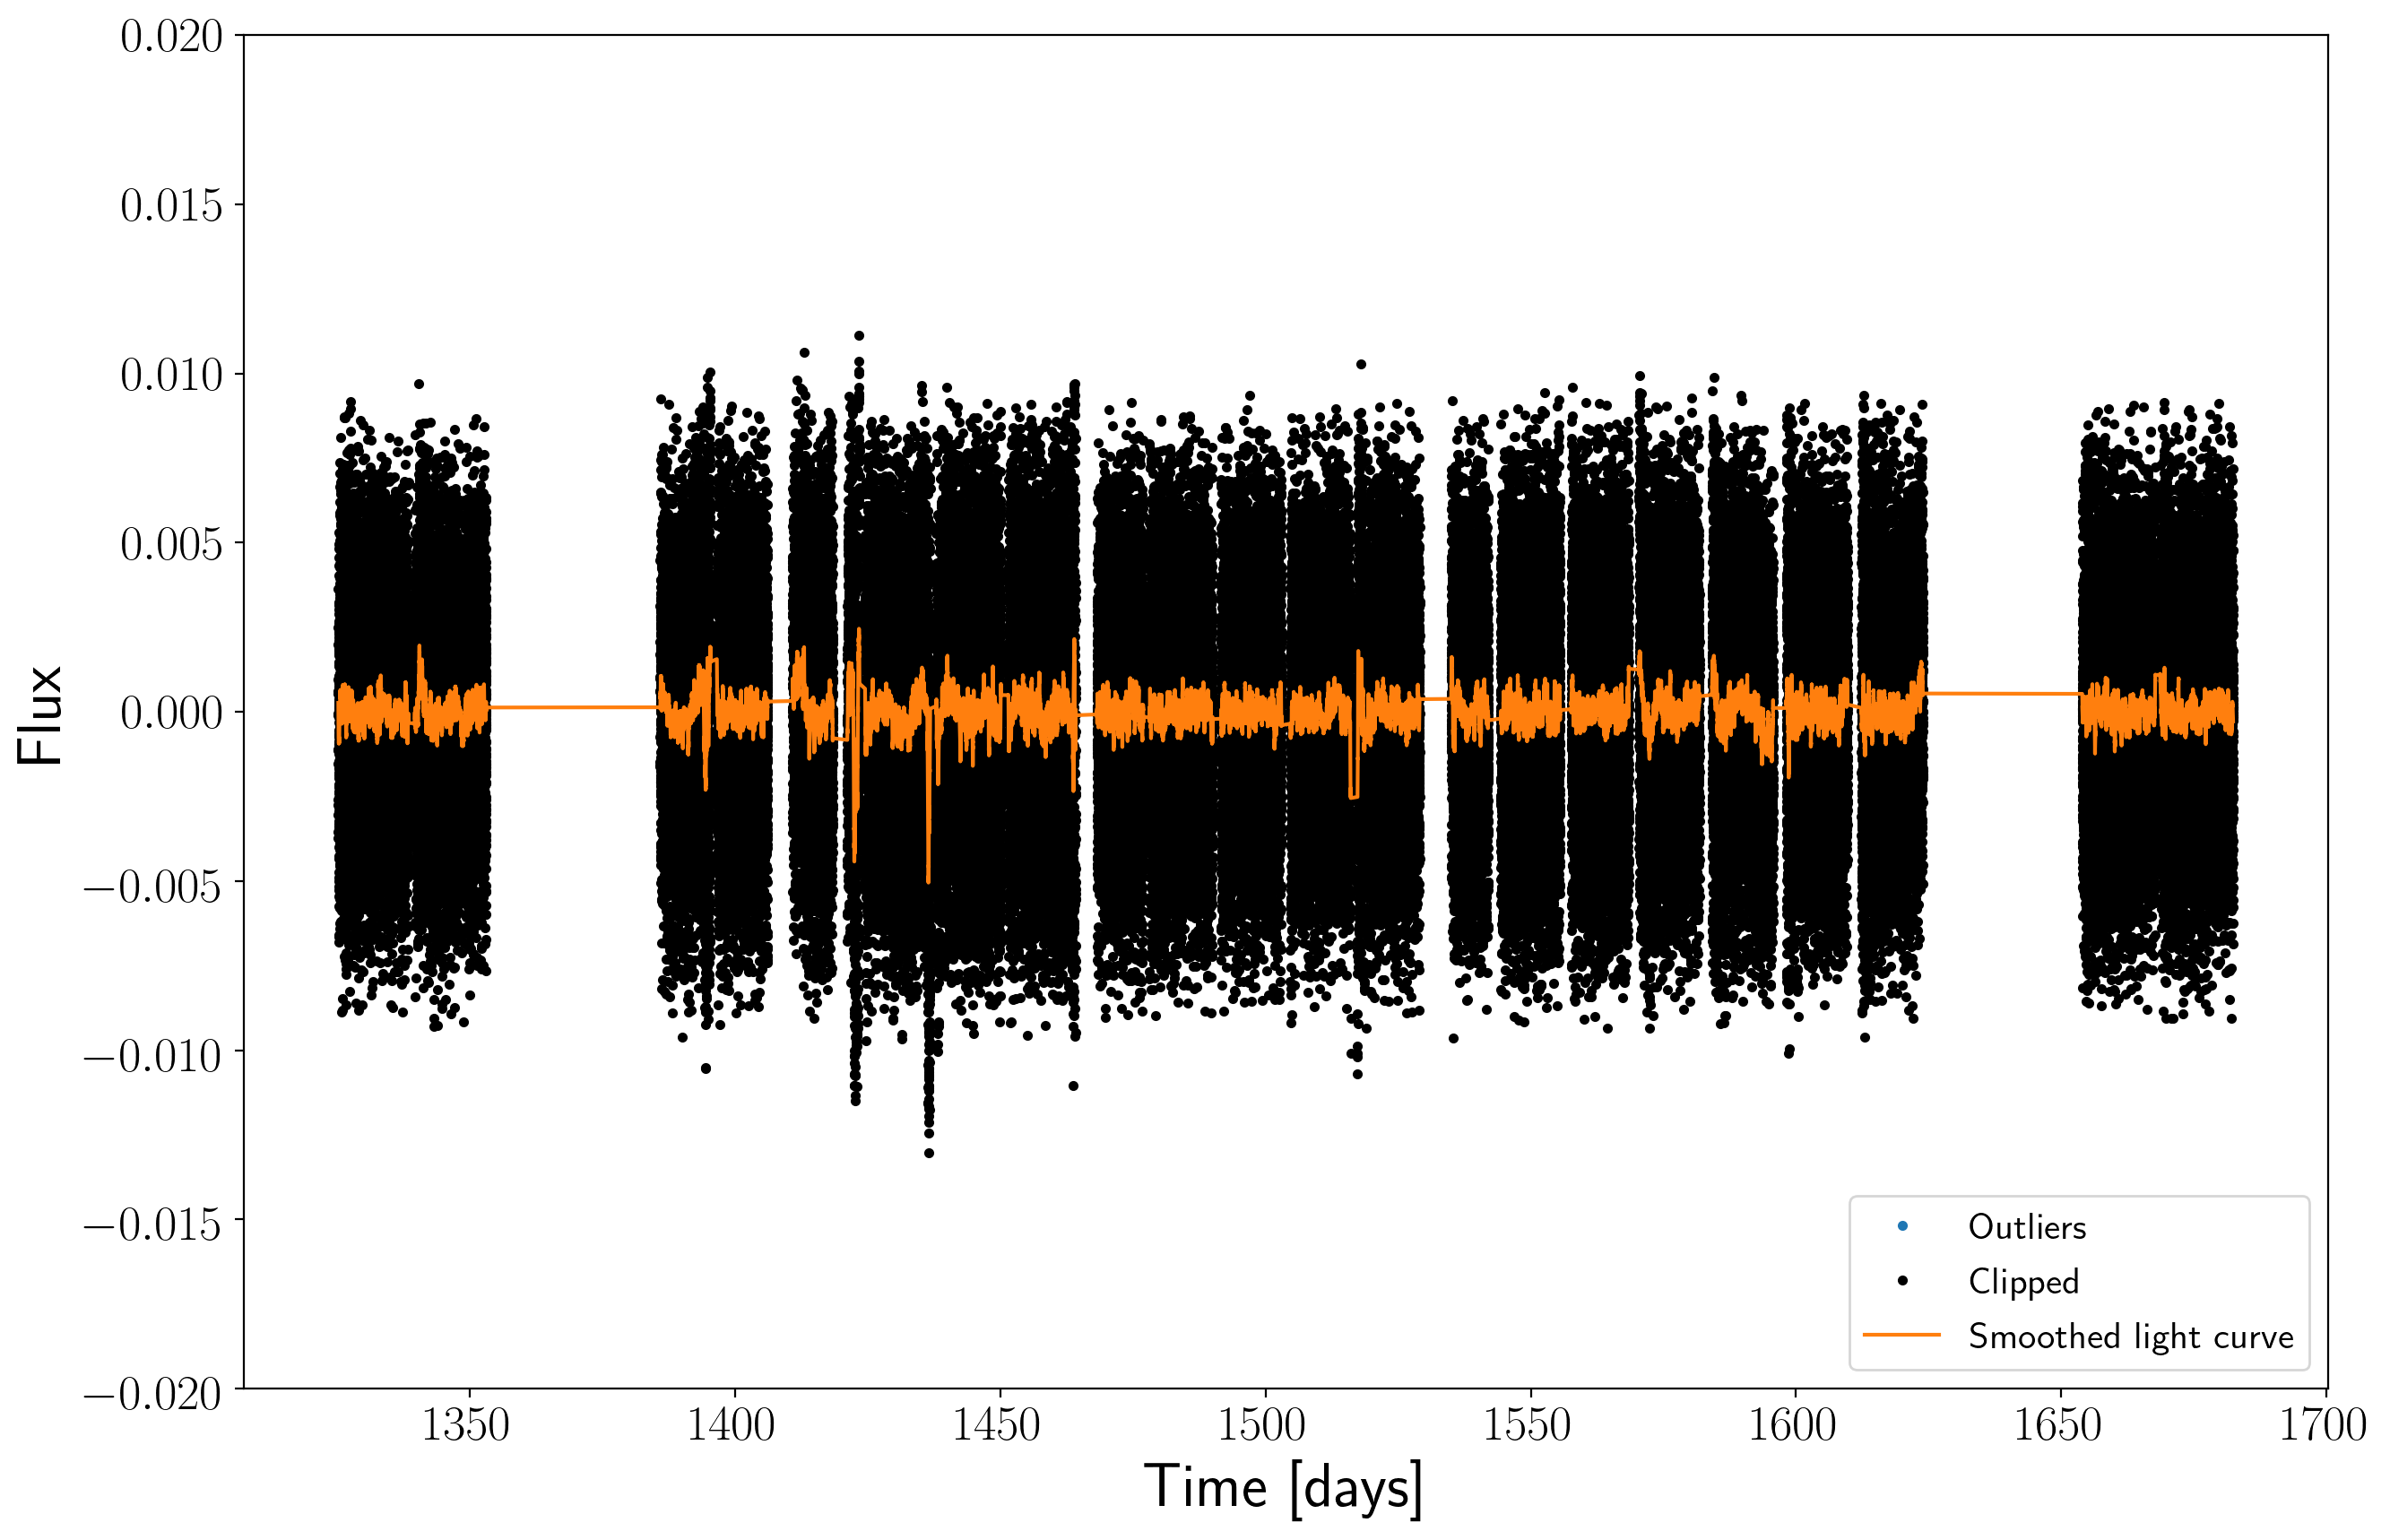

In [105]:
plt.figure(figsize=(15, 10), dpi=200)
plt.plot(time, flux/med-1, ".", label="Outliers")
plt.plot(time, flux, "k.", label="Clipped")
plt.plot(x, smooth, label="Smoothed light curve")
plt.xlabel("Time [days]")
plt.ylabel("Flux");
plt.ylim(-.02, .02);
plt.legend(loc="lower right", fontsize=15);
#plt.xlim(1420,1440);
#plt.xlim(1435,1437);#planet?

(1436, 1437)

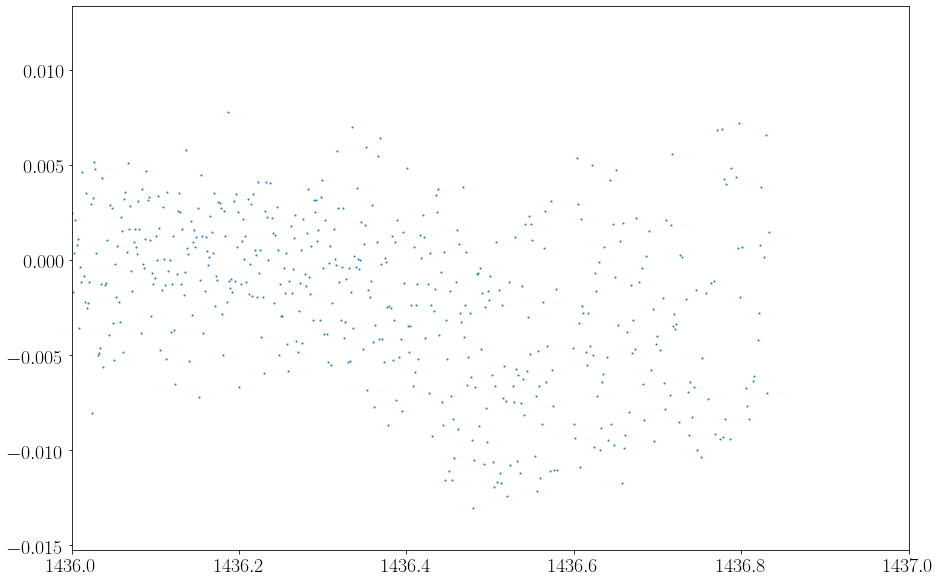

In [103]:
plt.figure(figsize=(15,10))
plt.scatter(time,flux,s=1)
#plt.xlim(1420,1440)
plt.xlim(1436,1437)

# Testing ssTESS.py ---------------------------------------------------------

In [2]:
# def a fcn for cleaning

###defing fcn to clean and stitch full lightcurve #############################
def prep_lcfs(tic,path=None):
    """ 
    Locates all TESS lightcurve files with filenames formatted from a mast bulk dl.
    Does minor cleaning & stitching, then plots final lightcurve.
    REQUIRES: lightkurve, glob, os


    
    Args:
        tic: TIC identification number (integer or string).
        path: (optional) computer path to file location (string) (excluding filename).
        
    Returns:
        cleaned & stitched lightkurve object.
    """
#locates files
    if path == None: #if only need filename
        fullpath = glob.glob('*{}-*-s_lc.fits'.format(tic)) #to use wildcard*
    elif path == 'mypath': #path on my computer
        fullpath = glob.glob('data/LightCurves/*{}-*-s_lc.fits'.format(tic)) #to use wildcard*
    else: #to change path for other computer
        pathstart = path #user defined path to datafile on their computer  
        pathstart = str(pathstart) #make a string in case user forgets to but think that gives an err anyway
        pathend = pathstart +'*{}-*-s_lc.fits'.format(tic) #stitches path & filename
        fullpath= glob.glob(pathend) #to use wildcard* 
#collects files into a lightkurve class object
    if len(fullpath) >=1:
        print('more than one file found!')
    lcfs =[] 
    sectorspresent = []
    mylist = [1,2,3,4,5,6,7,8,9,10,11,12,13]
    for i in mylist:
        for file in fullpath:
            lcfile = lk.open(file) #open only works one file at a time
            mystring = str(type(lcfile))
            if mystring[34:-2] == 'TessLightCurveFile': #guards against'TessTargetPixelFile'& more
                hdr = lcfile.header()
                sector = hdr['SECTOR']
                if i == sector:
                    lcfs.append(lcfile) #collect
                    sectorspresent.append(sector)
                else:
                    pass
            else:
                pass
    if len(lcfs)==0: 
        #print('Unable to locate any files for TIC {}; verify path/files exist'.format(tic))
        cleaned = -99
        number_ofsectors=0 #use to match with tic list and remove tics with no info
        usedsectors = 0
    else:
        number_ofsectors = int(len(lcfs))
        usedsectors = sectorspresent #0
#cleans & stitches #& plots
        lcfiles = lk.collections.LightCurveFileCollection(lcfs) #making list into class collection
        stitched = lcfiles.PDCSAP_FLUX.stitch() #this detrends/normalizes each sector before stitching together all lightcurves
        #could mask bad bits here then stitch, instead of stitch above
        nonans = stitched.remove_nans() #preps for periodogram etc
        cleaned = nonans.remove_outliers(sigma=5) #removes cosmic rays & flares mostly
##############################################################################################
#need to generalize for saving
        filename = 'data/SECONDRUN/cleaned_LightCurves/{}/lc.fits'.format(tic)
        #os.makedirs(os.path.dirname(filename), exist_ok=True) #verify/make folder with tic_id as the name
        #cleaned.to_fits(filename,flux_column_name = 'flux',overwrite=True); #save cleaned to file
#############################################################################################
    if number_ofsectors == 0:
        #print('nothing found for: TIC',tic)
        return cleaned, number_ofsectors, usedsectors
    else:
        return cleaned, number_ofsectors, usedsectors #target final data table containing flux, time, flux_err 



In [33]:
#open target list


#### requires numpy 
cvz_tics = np.load('data/cool_cvz_tics.npy')
#cvz_tics = np.load('data/unique_cvz_tics.npy')
#cvz = cvz_tics['tic_id'].values#[0:10]
cvz_tics

array(['117935303', '118010415', '118053599', ..., '97876609', '98139294',
       '98237214'], dtype='<U9')

In [34]:
len(cvz_tics)

22632

In [32]:
cvz_tics[22631:]

array(['98237214'], dtype='<U9')

In [10]:
cvz_tics = ['201859220',]#['201859220',badone] 201858779 agoodone     ['38877693',]                    #['273511930',]

currently cleaning # 2973
currently cleaning # 2973
currently cleaning # 2973
currently cleaning # 2973
aka TIC: 201858779


more than one file found!


TIC-acf: 201858779 [2, 3] 2
ACF: 0.00416667 0.07083339 0.08055562000000001 0.0675413929642714 0.01987686330683969 0.019304578800049862
currently cleaning # 2974
currently cleaning # 2974
currently cleaning # 2974
currently cleaning # 2974
aka TIC: 201859220
more than one file found!
TIC-acf: 201859220 [2] 1
ACF: 0 0 0 -9999.0 -9999.0 -9999.0


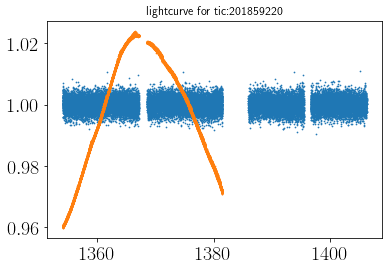

In [14]:
from starspot import simple_acf

#tests actual sspotTEST.py file
tics=[]
rvar_smoothed=[]
rvar_orig=[]
ls=[]
firstamps=[]
secondamps=[]
thirdamps=[]
ls2=[]
ls3=[]
acf=[]
acf2=[]
acf3=[]
acfamp1=[]
acfamp2=[]
acfamp3=[]
pdm=[]
stitched_sectors=[]

for count, tic in enumerate(cvz_tics[2973:2975]):
	count = count + 2973
	print('currently cleaning #', count)
	print('currently cleaning #', count)
	print('currently cleaning #', count)
	print('currently cleaning #', count)
	print('aka TIC:',tic)
	#test
	lc, totalsectors, sectorslist = prep_lcfs(tic,'mypath')
#	if str(type(lc)) == "<class 'lightkurve.lightcurve.TessLightCurve'>":
# #tic order
# 		tics.append(tic)
# 		#np.save('data/SECONDRUN/tic_order',tics)
# #
# #rvar-original
# 		R_var = np.percentile(lc.flux, 95) - np.percentile(lc.flux, 5)
# 		rvar_orig.append(R_var)
# 		#np.save('data/SECONDRUN/rvar_original',rvar_orig)
    	
#start Ruth tutorial code starspot
# 		# Calculate the median so that we can median-normalize.
# 		med = np.median(lc.flux)

# 		# Do an initial sigma clip to remove big outliers.
# 		m = sigma_clipping.sigma_clip(lc.flux/med - 1, nsigma=6)
# 		x, y, yerr = lc.time[m], lc.flux[m]/med - 1, lc.flux_err[m]/med

# 		# Then a sigma clip using a Sav-Gol filter for smoothing
# 		smooth, mask = sigma_clipping.filter_sigma_clip(x, y, window_length=199)
# 		time, flux, flux_err = x[mask], y[mask], yerr[mask]
#end Ruth tutorial code starspot

# #rvar-smoothed
# 		R_var2 = np.percentile(flux, 95) - np.percentile(flux, 5)
# 		rvar_smoothed.append(R_var2)
# 		#np.save('data/SECONDRUN/rvar_smoothed',rvar_smoothed)

# 		rotate = ss.RotationModel(time, flux, flux_err) 
# #ls rp
# 		ls_period = rotate.ls_rotation()
# 		print('Lomb-Scargle Measurement is {} day rotation'.format(ls_period))
# 		ls.append(ls_period)
# 		#np.save('data/SECONDRUN/ls_rps', ls)
# 		#getting peak-heights-ls
# 		power = rotate.power
# 		freq = rotate.freq
# 		ps = 1./freq
# 		peaks = np.array([i for i in range(1, len(ps)-1) if power[i-1] < \
# 						power[i] and power[i+1] < power[i]])
# 		peak_amps_low2high = np.sort(power[peaks])
# #amplitudes of ls top 3 peaks/rps
# 		first_peakamp = peak_amps_low2high[-1]
# 		firstamps.append(first_peakamp)
# 		#np.save('data/SECONDRUN/ls_amps',firstamps)
# 		second_peakamp = peak_amps_low2high[-2]
# 		secondamps.append(second_peakamp)
# 		#np.save('data/SECONDRUN/second_ls_amp',secondamps)
# 		third_peakamp = peak_amps_low2high[-3]
# 		thirdamps.append(third_peakamp)
# 		#np.save('data/SECONDRUN/third_ls_amp',thirdamps)
# #second/third highest ls rp
# 		second_rp = ps[power == second_peakamp][0]
# 		ls2.append(second_rp)
# 		#np.save('data/SECONDRUN/second_ls_rp',ls2) #ls-rp2
# 		third_rp = ps[power == third_peakamp][0]
# 		ls3.append(third_rp)
# 		#np.save('data/SECONDRUN/third_ls_rp',ls3) #ls-rp3

		
# #total num sectors
# 		stitched_sectors.append(totalsectors)
# 		#np.save('data/SECONDRUN/stitched_sectors',stitched_sectors)
# 		print('sectors:',totalsectors,'which sectors:',sectorslist)
# 	else:
# 		print('Not correct type OR nothing found for TIC:', tic, 'at count:',count,'type:', type(lc))
# 		continue
		
	if str(type(lc)) == "<class 'lightkurve.lightcurve.TessLightCurve'>":
		print('TIC-acf:', tic,sectorslist,totalsectors)
    ################################################################################


		med = np.median(lc.flux)
		plt.scatter(lc.time,lc.flux,s=.5)
		plt.title('lightcurve for tic:{}'.format(tic))       
		# Do an initial sigma clip to remove big outliers.
		m = sigma_clipping.sigma_clip(lc.flux/med - 1, nsigma=6)
		x, y, yerr = lc.time[m], lc.flux[m]/med - 1, lc.flux_err[m]/med

		# Then a sigma clip using a Sav-Gol filter for smoothing
		smooth, mask = sigma_clipping.filter_sigma_clip(x, y, window_length=199)
		time, flux, flux_err = x[mask], y[mask], yerr[mask]
        
		rotate = ss.RotationModel(lc.time,lc.flux,lc.flux_err) ################original
		tess_cadence = 1./24./30. ################original
#acf rp
		#acf_period = rotate.acf_rotation(tess_cadence)
    
		interval = 0.00138889
        
        
		lags1, acf1 = simple_acf(time, flux, interval, smooth=9,window_length=99,polyorder=3)
		#plt.plot(lags,acf)
		m = lags1 > 0
        
# 		print('first tests:',len(lags),len(acf))
# 		print('TESTs:',len(lags[m]),len(acf[m]))
		x2 = lags1[m]
		y2 = acf1[m]
        
		peaks = np.array([i for i in range(1, len(y2)-1) if y2[i-1] <y2[i] and y2[i+1] < y2[i]])
#		print('peaks TESTS:',peaks,len(peaks))
		if len(peaks) >= 1:
#			print('peaks TESTING:',peaks)
			x_peaks = x2[peaks]
			y_peaks = y2[peaks]
			inds = np.argsort(y_peaks)
			xpeaks, ypeaks = x_peaks[inds][::-1], y_peaks[inds][::-1]
			acf_rp = xpeaks[0]
			acf_amp1 = y_peaks[0]
			lags = lags1[m]
			acf = acf1[m]
			if len(peaks) >=2:
				acfrp2 = xpeaks[1]
				acf_amp2 = ypeaks[1]
			else:
				acfrp2 = 0
				acf_amp2 = -9999
			if len(peaks) >=3:
				acfrp3 = xpeaks[2]
				acf_amp3 = ypeaks[2]
			else:
				acfrp3 = 0
				acf_amp3 = -9999.
                    
		else:
			acf_rp = 0
			acfrp2 = 0
			acfrp3 = 0
			acf_amp1 = -9999.
			acf_amp2 = -9999.
			acf_amp3 = -9999.
		print('ACF:',acf_rp,acfrp2,acfrp3,acf_amp1,acf_amp2,acf_amp3)


    ################################################################################
	else:
		continue
   
 # 		print('ACF Measurement is {} day rotation'.format(acf_period))
# 		acf.append(acf_period)
# 		#np.save('data/SECONDRUN/acf_rps',acf)
# #second/third acf rps
# 		x = rotate.lags
# 		y = rotate.acf
# 		peaks = np.array([i for i in range(1, len(y)-1) if y[i-1] < y[i] and \
# 						y[i+1] < y[i]])
# 		x_peaks = x[peaks]
# 		y_peaks = y[peaks]
# 		inds = np.argsort(y_peaks)
# 		xpeaks = x_peaks[inds][::-1]
# 		print('tests:',np.shape(peaks),np.shape(x),'arrs:',x_peaks,'peaks:',peaks,x)
# 		if len(xpeaks) >= 2:
# 			acfrp2 = xpeaks[1]
# 		else:
# 			acfrp2 = -9999.
# 		acf2.append(acfrp2)
# 		#np.save('data/SECONDRUN/second_acf_rps',acf2)
# 		if len(xpeaks) >= 3:
# 			acfrp3 = xpeaks[2]
# 		else:
# 			acfrp3 = -9999.
# 		acf3.append(acfrp3)
# 		#np.save('data/SECONDRUN/third_acf_rps',acf3)
# #amplitudes
# 		acf_amp1 = y_peaks[0]
# 		acfamp1.append(acf_amp1)
# 		#np.save('data/SECONDRUN/acf_amps',acfamp1)
# 		if len(peaks) >=2:
# 			acf_amp2 = y_peaks[1]
# 		else:
# 			acf_amp2 = -9999.
# 		acfamp2.append(acf_amp2)
# 		#np.save('data/SECONDRUN/second_acf_amp',acfamp2)
# 		if len(peaks) >=3:
# 			acf_amp3 = y_peaks[2]
# 		else:
# 			acf_amp3 = -9999.
# 		acfamp3.append(acf_amp3)
# 		#np.save('data/SECONDRUN/third_acf_amp',acfamp3)
# 	else:
# 		continue		
    
    
# stats = Table([tics,stitched_sectors,rvar_orig,rvar_smoothed,ls,ls2,ls3,firstamps,secondamps,thirdamps,acf,acf2,acf3, \
# 		acfamp1,acfamp2,acfamp3],names=('ID','TOTALnum_sectors','Rvar','Rvar-smoothedlc','ls_rp1','ls_rp2','ls_rp3', \
# 		'ls_amp1','ls_amp2','ls_amp3','acf_rp1','acf_rp2','acf_rp3','acf_amp1','acf_amp2','acf_amp3'))
#stats.write('data/SECONDRUN/stats_table.fits', format='fits',overwrite=True)

(0.9, 1.0)

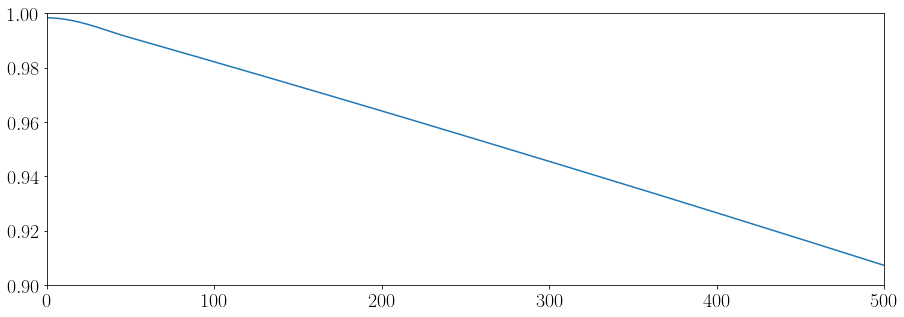

In [111]:
plt.figure(figsize=(15,5))
plt.plot(y2)
plt.xlim(0,500)
plt.ylim(.9,1.)

In [76]:
stats

<Table length=1>
    ID    TOTALnum_sectors         Rvar         ... acf_amp2 acf_amp3
   str9        int64             float64        ... float64  float64 
--------- ---------------- -------------------- ... -------- --------
273511930                2 0.044750881195068426 ...  -9999.0  -9999.0

In [59]:
Table.read('data/SECONDRUN/stats_table.fits')

In [130]:
# #testing full script on 2 stars



# #measure rotation periods  
# ### requires starrotate, Table     
# tics=[]
# ls=[]
# stitched_sectors=[]
# acf=[]
# pdm=[]

# for count, tic in enumerate(cvz_tics[0:2]):
#     print('currently cleaning #', count)
#     print('aka TIC:',tic)

#     lc, totalsectors, sectorslist = prep_lcfs(tic,'mypath')
#     if str(type(lc)) == "<class 'lightkurve.lightcurve.TessLightCurve'>":
#         print('FOUND SOMETHING!!!! at count:',count,'tic:',tic)
#         tics.append(tic)
#         np.save('data/SECONDRUN/tic_order',tics) #################################################
        
# #start Ruth tutorial code starspot
#         # Calculate the median so that we can median-normalize.
#         med = np.median(lc.flux)

#         # Do an initial sigma clip to remove big outliers.
#         m = sigma_clipping.sigma_clip(lc.flux/med - 1, nsigma=6)
#         x, y, yerr = lc.time[m], lc.flux[m]/med - 1, lc.flux_err[m]/med

#         # Then a sigma clip using a Sav-Gol filter for smoothing
#         smooth, mask = sigma_clipping.filter_sigma_clip(x, y, window_length=199)
#         time, flux, flux_err = x[mask], y[mask], yerr[mask]
# #end Ruth tutorial code starspot


#         rotate = ss.RotationModel(time, flux, flux_err) 
#         ls_period = rotate.LS_rotation()
#         print('Lomb-Scargle Measurement is {} day rotation'.format(ls_period))
#         ls.append(ls_period)
#         np.save('data/SECONDRUN/ls_periods', ls) #################################################
#         stitched_sectors.append(totalsectors)
#         np.save('data/SECONDRUN/totnum_sectors',stitched_sectors) #################################################
#         print('sectors:',totalsectors,'which sectors:',sectorslist)
#     else:
#         print('Not correct type OR nothing found for TIC:', tic, 'at count:',count,'type:', type(lc))
#         continue
#     if str(type(lc)) == "<class 'lightkurve.lightcurve.TessLightCurve'>":
#         print('TIC-acf:', tic)
#         rotate = sr.RotationModel(lc.time,lc.flux,lc.flux_err)
#         tess_cadence = 1./24./30.
#         acf_period = rotate.ACF_rotation(tess_cadence)
#         print('ACF Measurement is {} day rotation'.format(acf_period))
#         acf.append(acf_period)
#         np.save('data/SECONDRUN/acf_periods',acf) #################################################
#     else:
#         continue

    
    
# stats = Table([tics,ls,acf,stitched_sectors],names=('ID','ls_period','acf_period','TOTALnum_sectors'))
# stats.write('data/SECONDRUN/stats_table.fits', format='fits',overwrite=True)

# Start Run from here--------------------------------------------------------------------

# Testing sspotTEST OUTPUTS

In [1]:
import lightkurve as lk
import glob
import os
import numpy as np
import starspot as ss
from astropy.table import Table, join
import pandas as pd
from starspot import sigma_clipping

from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
#take away last value from these arrays so len matches acf

includedsec = np.load('data/SECONDRUN/included_sectors2.npy',allow_pickle=True) #from sspotTEST2.py

#sectors parts 1 & 2
sec = np.load('data/SECONDRUN/stitched_sectors.npy')
sec2 = np.load('data/SECONDRUN/stitched_sectors2.npy')

#ls
lsf = np.load('data/SECONDRUN/ls_rps.npy')
lsampf = np.load('data/SECONDRUN/ls_amps.npy')
ls2f = np.load('data/SECONDRUN/second_ls_rp.npy')
ls2ampf = np.load('data/SECONDRUN/second_ls_amp.npy')
ls3f = np.load('data/SECONDRUN/third_ls_rp.npy')
ls3ampf = np.load('data/SECONDRUN/third_ls_amp.npy')

#ls-part 2
lsf_2 = np.load('data/SECONDRUN/ls_rps2.npy')
lsampf_2 = np.load('data/SECONDRUN/ls_amps2.npy')
ls2f_2 = np.load('data/SECONDRUN/second_ls_rp2.npy')
ls2ampf_2 = np.load('data/SECONDRUN/second_ls_amp2.npy')
ls3f_2 = np.load('data/SECONDRUN/third_ls_rp2.npy')
ls3ampf_2 = np.load('data/SECONDRUN/third_ls_amp2.npy')

#ticorder parts 1 & 2
tico = np.load('data/SECONDRUN/tic_order.npy')
tico2 = np.load('data/SECONDRUN/tic_order2.npy')



#rvar parts 1 & 2
rvarf = np.load('data/SECONDRUN/rvar_original.npy')
rvarfs = np.load('data/SECONDRUN/rvar_smoothed.npy')
rvarf2 = np.load('data/SECONDRUN/rvar_original2.npy')
rvarfs2 = np.load('data/SECONDRUN/rvar_smoothed2.npy')


# dont take away lengths from part 1 arrays 
#acf
acff = np.load('data/SECONDRUN/acf_rps.npy')
acfampf = np.load('data/SECONDRUN/acf_amps.npy')
acf2f = np.load('data/SECONDRUN/second_acf_rps.npy')
acf2ampf = np.load('data/SECONDRUN/second_acf_amp.npy')
acf3f = np.load('data/SECONDRUN/third_acf_rps.npy')
acf3ampf = np.load('data/SECONDRUN/third_acf_amp.npy')

#acf-part2
acff_2 = np.load('data/SECONDRUN/acf_rps2.npy')
acfampf_2 = np.load('data/SECONDRUN/acf_amps2.npy')
acf2f_2 = np.load('data/SECONDRUN/second_acf_rps2.npy')
acf2ampf_2 = np.load('data/SECONDRUN/second_acf_amp2.npy')
acf3f_2 = np.load('data/SECONDRUN/third_acf_rps2.npy')
acf3ampf_2 = np.load('data/SECONDRUN/third_acf_amp2.npy')

print('FIRSTS:',len(acff),len(acfampf),len(acf2f),len(acf2ampf),len(acf3f),len(acf3ampf),'break',len(sec),len(lsf),len(lsampf), \
     len(ls2f),len(ls2ampf),len(ls3f),len(ls3ampf),len(tico),len(rvarf),len(rvarfs))

print('SECONDS:',len(acff_2),len(acfampf_2),len(acf2f_2),len(acf2ampf_2),len(acf3f_2),len(acf3ampf_2),'break',len(sec2),len(lsf_2),len(lsampf_2), \
     len(ls2f_2),len(ls2ampf_2),len(ls3f_2),len(ls3ampf_2),len(tico2),len(rvarf2),len(rvarfs2))
print('included sectors:',len(includedsec),includedsec.shape,len(includedsec[0]),len(includedsec[127]))

FIRSTS: 2974 2974 2974 2974 2974 2974 break 2975 2975 2975 2975 2975 2975 2975 2975 2975 2975
SECONDS: 19656 19656 19656 19656 19656 19656 break 19656 19656 19656 19656 19656 19656 19656 19656 19656 19656
included sectors: 19656 (19656,) 2 1


In [3]:
#stitching arrays
acfrp1 = np.append(acff,acff_2)
acfrp2 = np.append(acf2f,acf2f_2)
acfrp3 = np.append(acf3f,acf3f_2)
acfrp1_amp = np.append(acfampf,acfampf_2)
acfrp2_amp = np.append(acf2ampf,acf2ampf_2)
acfrp3_amp = np.append(acf3ampf,acf3ampf_2)

#removing last value & stitching arrays
lsrp1 = np.append(lsf[:-1],lsf_2)
lsrp2 = np.append(ls2f[:-1],ls2f_2)
lsrp3 = np.append(ls3f[:-1],ls3f_2)
lsrp1_amp = np.append(lsampf[:-1],lsampf_2)
lsrp2_amp = np.append(ls2ampf[:-1],ls2ampf_2)
lsrp3_amp = np.append(ls3ampf[:-1],ls3ampf_2)

secs = np.append(sec[:-1],sec2)

tics_order = np.append(tico[:-1],tico2)


rvar = np.append(rvarf[:-1],rvarf2)
rvarsmooth = np.append(rvarfs[:-1],rvarfs2)

print('ACFs:',len(acfrp1),len(acfrp2),len(acfrp3),'ACFamps:',len(acfrp1_amp),len(acfrp2_amp),len(acfrp3_amp), \
      'LSs:',len(lsrp1),len(lsrp2),len(lsrp3),'LSamps:',len(lsrp1_amp),len(lsrp2_amp),len(lsrp3_amp), \
      'Others:',len(rvar),len(rvarsmooth),len(secs),len(tics_order))
#[22631] had an error tic98237214

ACFs: 22630 22630 22630 ACFamps: 22630 22630 22630 LSs: 22630 22630 22630 LSamps: 22630 22630 22630 Others: 22630 22630 22630 22630


In [4]:
#creates stat table

stats = Table([tics_order,secs,rvar,rvarsmooth,lsrp1,lsrp2,lsrp3,lsrp1_amp,lsrp2_amp, \
        lsrp3_amp,acfrp1,acfrp2,acfrp3, acfrp1_amp,acfrp2_amp,acfrp3_amp],names=('ID','TOTALnum_sectors', \
        'Rvar','Rvar-smoothed','ls_rp1','ls_rp2','ls_rp3','ls_amp1','ls_amp2','ls_amp3', \
        'acf_rp1','acf_rp2','acf_rp3','acf_amp1','acf_amp2','acf_amp3'))
stats

<Table length=22630>
    ID    TOTALnum_sectors ...        acf_amp2              acf_amp3      
   str9        int64       ...        float64               float64       
--------- ---------------- ... --------------------- ---------------------
117935303                1 ...  0.014742200479098926   0.01475639314480891
118010415                1 ...  0.025799902993782188  0.025638647552935948
118053599                1 ...   -0.6103651534235403   -0.6103835388887792
118054887                1 ...    0.0223048013592647  0.021911016726542706
118055540                1 ...    0.1795933876449881   0.17973266770118682
118060883                1 ...   0.04483634865526029   0.04459989887672873
118074571                3 ...  0.017814751523811574   0.01763408596626565
118078652                2 ...   0.07836735988345919   0.07726148514113947
118079187                2 ...    0.2154557438669364    0.2151677947189887
118079457                2 ... -0.010938346539760268 -0.010910006534641817
      ...              ... ...                   ...                   ...
 90832108                1 ...   0.04070597504982757   0.04062300301634955
 90832769                1 ...   0.07517595025174943   0.07293916602577835
 90836525                1 ...    0.8102341809248081    0.7886010568743188
 97605892                1 ...   0.11455258851453613    0.0973633849189415
 97616288                1 ...  0.037914768589062724  0.036531689156902615
 97739446                1 ...   0.05312309559306302   0.05259720799235413
 97876254                1 ...  0.009950760610204392  0.009905612053984311
 97876609                1 ...   0.03312869475975827   0.03303321513361052
 98139294                1 ...  0.005419656319393218  0.005273871865565234
 98237214                1 ...    0.6808239124298633    0.6808146196873516

In [5]:
tictable = Table.read('data/tic_table.fits') #tic catalog for teffs


fullt = join(stats,tictable)

## explores stats

22630


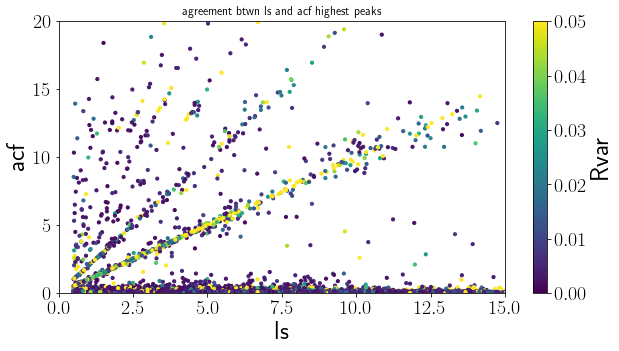

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(lsrp1,acfrp1,s=10,c=rvar,vmax=.05,vmin=0)
plt.xlabel('ls')
plt.ylabel('acf');
plt.colorbar().set_label('Rvar')
plt.ylim(0,20)
plt.xlim(0,15)
plt.title('agreement btwn ls and acf highest peaks');
print(len(acfrp1))


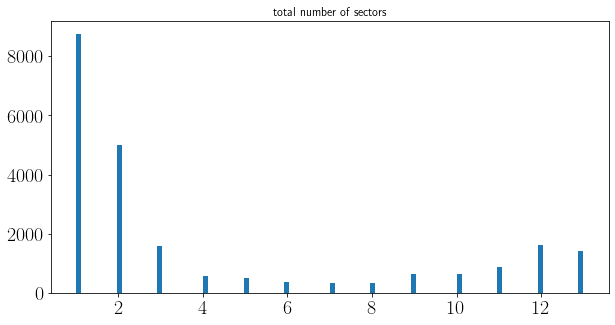

In [7]:
plt.figure(figsize=(10,5))
#st = Table([acff,acfampf,])
plt.hist(secs, bins=100);#,s = 4,vmax=.02,vmin=0);
# plt.colorbar().set_label(label='Rvar',size=20)
#plt.ylim(0,2000)
plt.title('total number of sectors');

(0, 50)

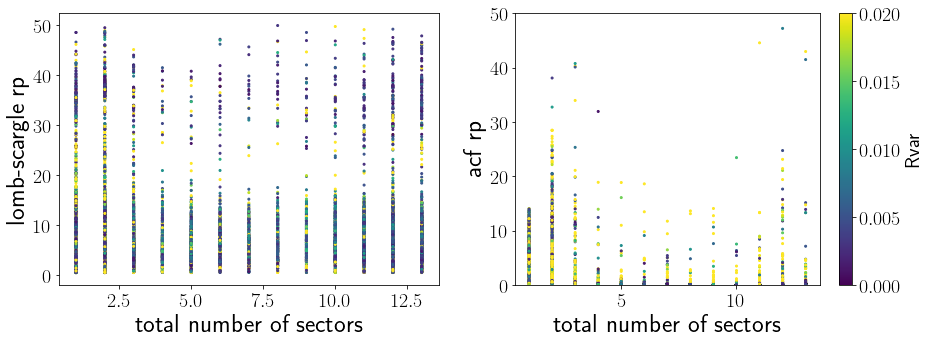

In [8]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
im1 = ax1.scatter(secs,lsrp1,c=rvar,s=4,vmax=.02,vmin=0)
#f.colorbar(im1,ax=(ax1)).set_label(label='Rvar',size=10)
ax1.set_xlabel('total number of sectors');
ax1.set_ylabel('lomb-scargle rp');

im2=ax2.scatter(secs,acfrp1,c=rvar,s=4,vmax=.02,vmin=0)
f.colorbar(im2,ax=(ax2)).set_label(label='Rvar',size=20)
ax2.set_xlabel('total number of sectors');
ax2.set_ylabel('acf rp');
ax2.set_ylim(0,50)

# plt.figure(figsize=(10,5))
# plt.scatter(secs,lsrp1,c=rvar,s = 4,vmax=.02,vmin=0);
# plt.colorbar().set_label(label='Rvar',size=20)
# plt.xlabel('total number of sectors');
# plt.ylabel('lomb-scargle rp');

In [9]:
for count in range(3):
    i = count +1
    print(i,'ACF:','max:',np.max(stats['acf_rp{}'.format(i)]),'min:',np.min(stats['acf_rp{}'.format(i)]))
    print(i,'LS:','max:',np.max(stats['ls_rp{}'.format(i)]),'min:',np.min(stats['ls_rp{}'.format(i)]))
#print(

1 ACF: max: 173.80708349 min: 0.0
1 LS: max: 49.85193826274229 min: 0.5000198009821287
2 ACF: max: 176.45138888888886 min: 0.0
2 LS: max: 49.9011946465463 min: 0.5006393729369071
3 ACF: max: 176.45416666666665 min: -9999.0
3 LS: max: 49.85193826274229 min: 0.5003021354809718


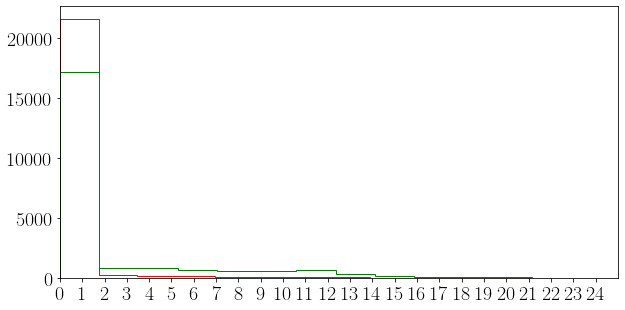

In [10]:
total_acf = stats[np.where(stats['acf_rp1']==0)] #3rp has 105; 2rp has 59; 1rp has 21
total_acf9999 = stats[np.where(stats['acf_rp2']==-9999)] #1rp has 0; 2rp has 0; 3rp has 4 with statsidx=[#43,132,2512,2788]
#total_acf9999

#ls got measurements for all
#total_ls = stats[np.where(stats['ls_rp3']==0)] #1rp has 0; 2rp has 0; 3rp has 0
#total_ls9999 = stats[np.where(stats['ls_rp1']==-9999)] #1rp has 0; 2rp has 0; 3rp has 0

plt.figure(figsize=(10,5))
plt.hist(stats['acf_rp1'],bins=100,color='red',histtype='step');
plt.hist(stats['acf_rp2'],bins=100,color='green',histtype='step');
#plt.hist(stats['acf_rp3'],bins=100,color='blue',histtype='step');
#plt.xlim(70,200)
#plt.ylim(0,200)
plt.xlim(0,25)
plt.xticks(np.arange(0,25,1));

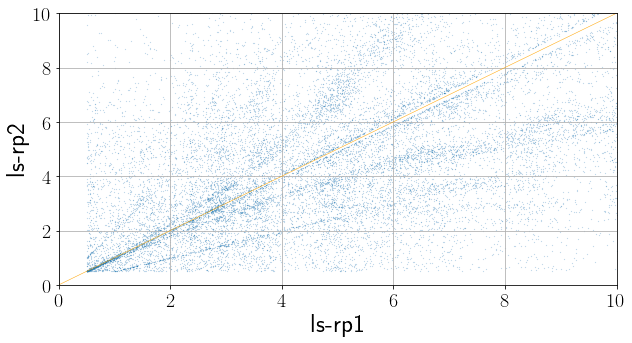

In [11]:
xy = np.arange(0,50,1)
plt.figure(figsize=(10,5))
plt.scatter(lsrp1,lsrp2,s=.01)
plt.plot(xy,xy,color='orange',lw=.5)
plt.xlabel('ls-rp1');
plt.ylabel('ls-rp2');
# plt.xlim(0,20)
# plt.ylim(0,20)
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid()

0.0
2133


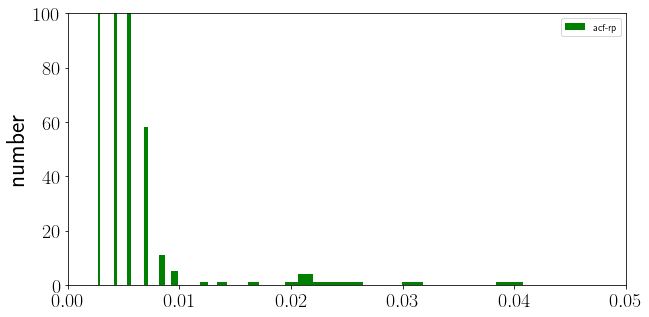

In [12]:
bins = np.logspace(np.log10(0.001),np.log10(10.0), 150)
plt.figure(figsize=(10,5))
plt.hist(acfrp1, bins = bins,color='green',label='acf-rp')#,histtype='bar');
plt.ylabel('number');
#plt.yscale('log')
plt.legend();
#plt.ylim(0,100)
# plt.xlim(0,1.5)
plt.xlim(0,.05)
plt.ylim(0,100)
#print(bins)
print(np.min(acfrp1))
print(len(acfrp1[np.where(acfrp1 <=0.01)]))

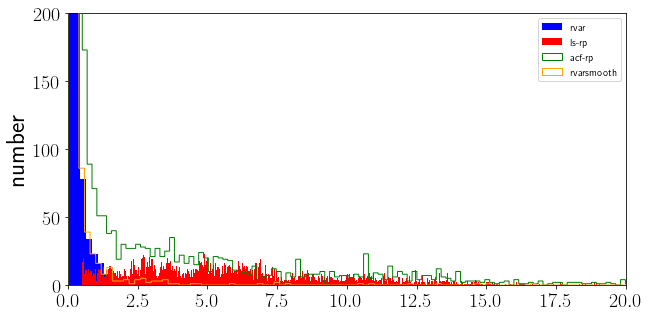

In [13]:
plt.figure(figsize=(10,5))
plt.hist(rvar,bins=1000,color='b',zorder=1,label='rvar');
plt.hist(lsrp1,bins=10000,color='r',zorder=2,label='ls-rp');
plt.hist(acfrp1, bins = 1000,color='green',histtype='step',zorder=3,label='acf-rp');
plt.hist(rvarsmooth, bins = 1000,color='orange',histtype='step',zorder=4,label='rvarsmooth');
plt.ylabel('number');
plt.legend()
#plt.xlim(0,.1)
#print(np.max(rvarf))
plt.ylim(0,200);
plt.xlim(0,20);

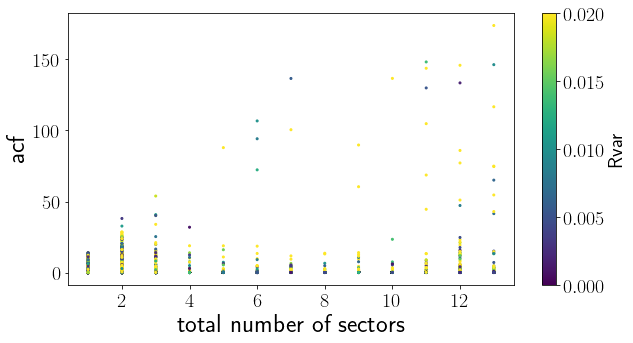

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(secs,acfrp1,c=rvar,s = 4,vmax=.02,vmin=0);
plt.colorbar().set_label(label='Rvar',size=20)
plt.xlabel('total number of sectors');
plt.ylabel('acf');

(0, 15)

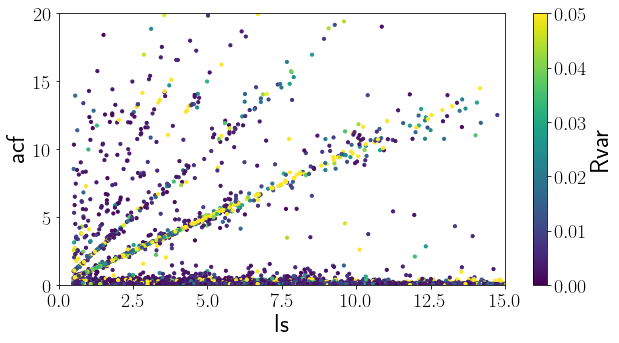

In [15]:

plt.figure(figsize=(10,5))
plt.scatter(lsrp1,acfrp1,s=10,c=rvar,vmax=.05,vmin=0)
plt.xlabel('ls');
plt.ylabel('acf');
plt.colorbar().set_label('Rvar');
plt.ylim(0,20)
plt.xlim(0,15)




(0, 15)

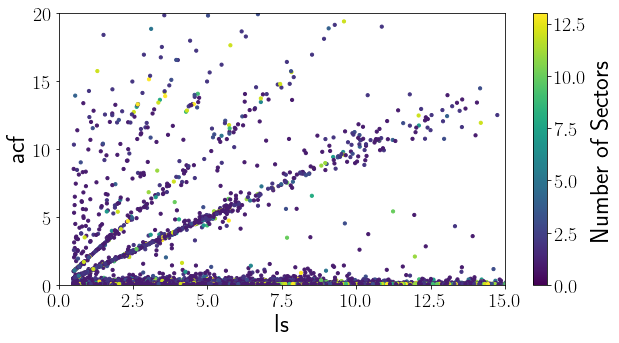

In [16]:

plt.figure(figsize=(10,5))
plt.scatter(lsrp1,acfrp1,s=10,c=secs,vmax=13,vmin=0)
plt.xlabel('ls');
plt.ylabel('acf');
plt.colorbar().set_label('Number of Sectors');
plt.ylim(0,20)
plt.xlim(0,15)

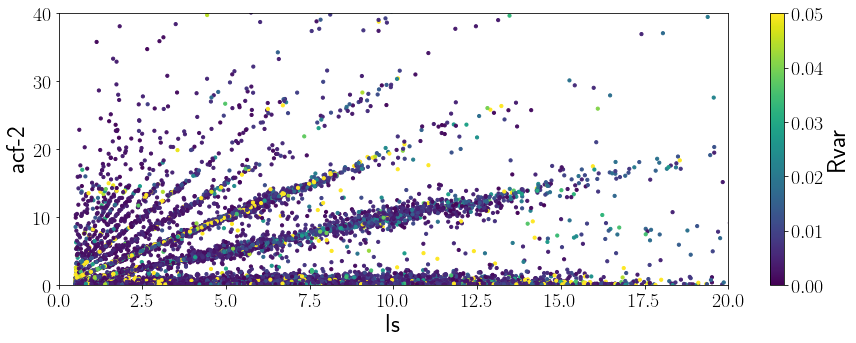

In [17]:
plt.figure(figsize=(15,5))
plt.scatter(lsrp1,acfrp2,s=10,c=rvar,vmax=.05,vmin=0)
plt.xlabel('ls')
plt.ylabel('acf-2');
plt.colorbar().set_label('Rvar');
plt.ylim(0,40);
plt.xlim(0,20);


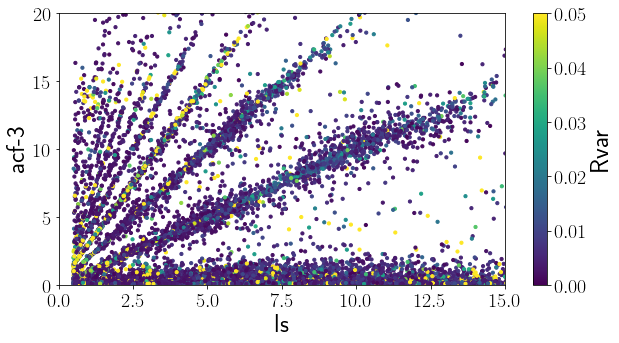

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(lsrp1,acfrp3,s=10,c=rvar,vmax=.05,vmin=0)
plt.xlabel('ls');
plt.ylabel('acf-3');
plt.colorbar().set_label('Rvar');
plt.ylim(0,20);
plt.xlim(0,15);


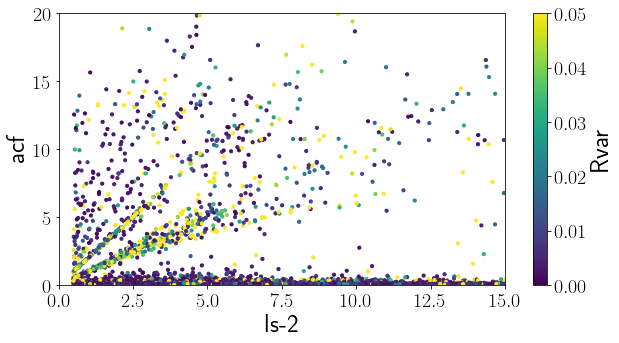

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(lsrp2,acfrp1,s=10,c=rvar,vmax=.05,vmin=0)
plt.xlabel('ls-2');
plt.ylabel('acf');
plt.colorbar().set_label('Rvar');
plt.ylim(0,20);
plt.xlim(0,15);


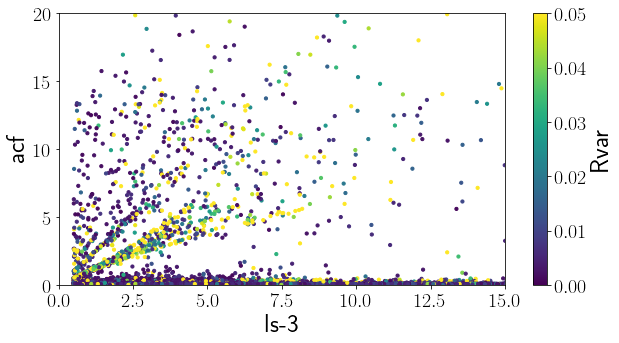

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(lsrp3,acfrp1,s=10,c=rvar,vmax=.05,vmin=0)
plt.xlabel('ls-3');
plt.ylabel('acf');
plt.colorbar().set_label('Rvar');
plt.ylim(0,20);
plt.xlim(0,15);


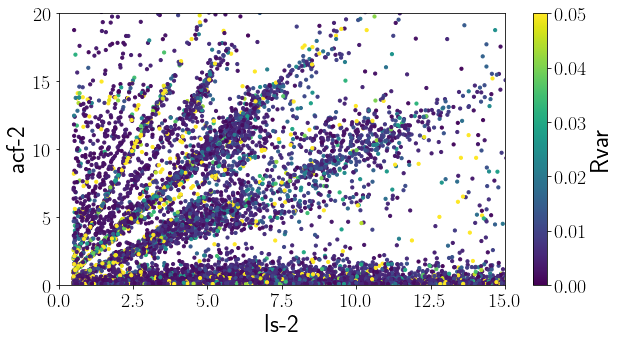

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(lsrp2,acfrp2,s=10,c=rvar,vmax=.05,vmin=0)
plt.xlabel('ls-2');
plt.ylabel('acf-2');
plt.colorbar().set_label('Rvar');
plt.ylim(0,20);
plt.xlim(0,15);


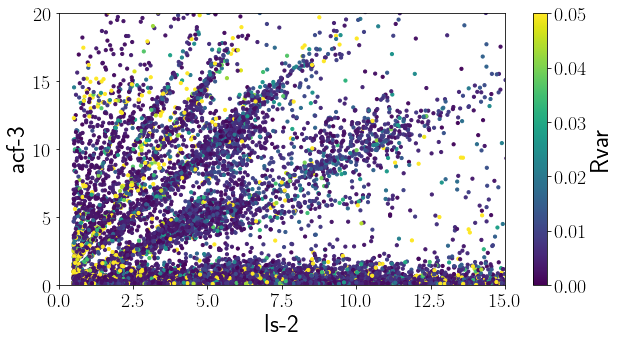

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(lsrp2,acfrp3,s=10,c=rvar,vmax=.05,vmin=0)
plt.xlabel('ls-2');
plt.ylabel('acf-3');
plt.colorbar().set_label('Rvar');
plt.ylim(0,20);
plt.xlim(0,15);


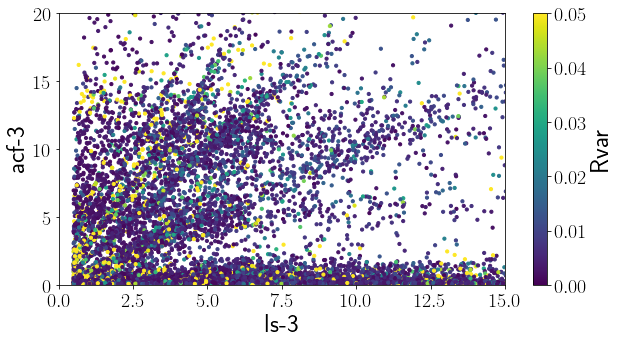

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(lsrp3,acfrp3,s=10,c=rvar,vmax=.05,vmin=0)
plt.xlabel('ls-3');
plt.ylabel('acf-3');
plt.colorbar().set_label('Rvar');
plt.ylim(0,20);
plt.xlim(0,15);


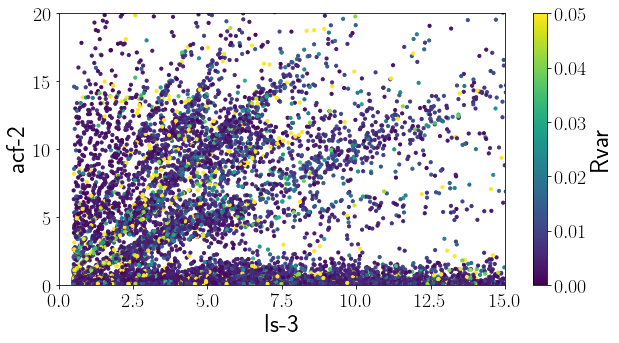

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(lsrp3,acfrp2,s=10,c=rvar,vmax=.05,vmin=0)
plt.xlabel('ls-3');
plt.ylabel('acf-2');
plt.colorbar().set_label('Rvar');
plt.ylim(0,20);
plt.xlim(0,15);


## analyze stats

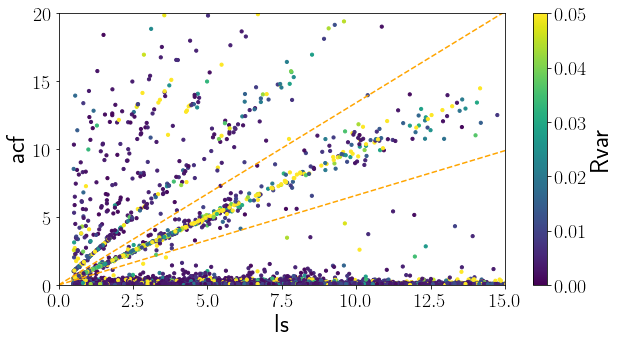

In [25]:
#isolating region within 1sig of agreement
xy = np.arange(0,150,1)



plt.figure(figsize=(10,5))
plt.scatter(lsrp1,acfrp1,s=10,c=rvar,vmax=.05,vmin=0)

plt.plot(xy+(.341*xy),linestyle='--',color='orange')
plt.plot(xy-(.341*xy),linestyle='--',color='orange')

plt.xlabel('ls');
plt.ylabel('acf');
plt.colorbar().set_label('Rvar');
plt.ylim(0,20);
plt.xlim(0,15);





In [26]:
#cutting to only agreement area

statsagree = stats[(stats['acf_rp1'] / stats['ls_rp1'] <= 1.341) & (stats['acf_rp1'] / stats['ls_rp1'] >= 0.659)]
statsagree


<Table length=1010>
    ID    TOTALnum_sectors ...       acf_amp2             acf_amp3      
   str9        int64       ...       float64              float64       
--------- ---------------- ... -------------------- --------------------
118195419                1 ...   0.6820113642745466    0.565276905088432
118200081                1 ...   0.7911902197186795   0.5361597021115533
118271813                1 ...    0.569937398161279   0.5167167301844355
118307280                3 ...   0.6583887046314889   0.5800471496899438
118409165                1 ...  0.16096737543017728  0.36498504441996465
118580840                1 ...   0.5773827464759462              -9999.0
118807628                1 ...   0.6846915523891803   0.6587731962578938
120334442                1 ...   0.7204210158880174    0.548594857483022
120334451                1 ...   0.6213969757388774              -9999.0
140661916                1 ...   0.7646850776936666  0.21283732385574286
      ...              ... ...                  ...                  ...
 66944319                2 ...   0.6018434390108041   0.5604818982647614
 68179248                1 ...   0.3487201509588248              -9999.0
 73149691                1 ... 0.011504113240377456 0.011464271176801205
 74184368                2 ...  0.25322660439896294   0.1500816332343368
 74828497                2 ...    0.371608365463837  0.37160381390579567
 75846415                1 ...  0.24314958319347751  0.17487207330620816
 76445598                1 ...   0.3404843762935181  0.28101802159766076
 84957329                1 ...   0.7298077951930018   0.6305590803261549
 89402158                2 ...  0.07583828715713677  0.07583774386828383
 89787749                2 ...   0.8201573973511191   0.7566466051668993

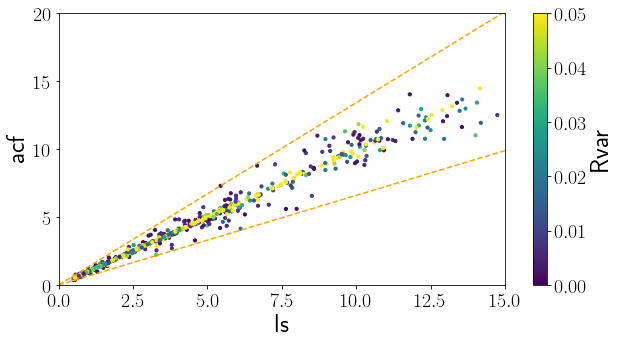

In [27]:
#isolating region within 1sig of agreement
xy = np.arange(0,150,1)

plt.figure(figsize=(10,5))
plt.scatter(statsagree['ls_rp1'],statsagree['acf_rp1'],s=10,c=statsagree['Rvar'],vmax=.05,vmin=0)
plt.plot(xy+(.341*xy),linestyle='--',color='orange')
plt.plot(xy-(.341*xy),linestyle='--',color='orange')
plt.xlabel('ls');
plt.ylabel('acf');
plt.colorbar().set_label('Rvar');
plt.ylim(0,20);
plt.xlim(0,15);

In [28]:
#adding to tic catalog to get temps
tictable = Table.read('data/tic_table.fits') #tic catalog for teffs

final_table = join(tictable,statsagree)
final_table

<Table masked=True length=1010>
    ID    version   HIP  ...       acf_amp2             acf_amp3      
   str9    bytes8  int64 ...       float64              float64       
--------- -------- ----- ... -------------------- --------------------
118195419 20190415    -- ...   0.6820113642745466    0.565276905088432
118200081 20190415    -- ...   0.7911902197186795   0.5361597021115533
118271813 20190415    -- ...    0.569937398161279   0.5167167301844355
118307280 20190415    -- ...   0.6583887046314889   0.5800471496899438
118409165 20190415    -- ...  0.16096737543017728  0.36498504441996465
118580840 20190415    -- ...   0.5773827464759462              -9999.0
118807628 20190415    -- ...   0.6846915523891803   0.6587731962578938
120334442 20190415    -- ...   0.7204210158880174    0.548594857483022
120334451 20190415    -- ...   0.6213969757388774              -9999.0
140661916 20190415    -- ...   0.7646850776936666  0.21283732385574286
      ...      ...   ... ...                  ...                  ...
 66944319 20190415    -- ...   0.6018434390108041   0.5604818982647614
 68179248 20190415 62986 ...   0.3487201509588248              -9999.0
 73149691 20190415    -- ... 0.011504113240377456 0.011464271176801205
 74184368 20190415 86290 ...  0.25322660439896294   0.1500816332343368
 74828497 20190415    -- ...    0.371608365463837  0.37160381390579567
 75846415 20190415 87522 ...  0.24314958319347751  0.17487207330620816
 76445598 20190415 88104 ...   0.3404843762935181  0.28101802159766076
 84957329 20190415    -- ...   0.7298077951930018   0.6305590803261549
 89402158 20190415    -- ...  0.07583828715713677  0.07583774386828383
 89787749 20190415    -- ...   0.8201573973511191   0.7566466051668993

In [29]:
#adding mcquillan data
mq_data = pd.read_csv('INTERN_DATA/McQuillan_data.csv')#my path
#naming variables
massmq = mq_data['Mass']
rpmq = mq_data['Prot']
tempmq = mq_data['Teff']

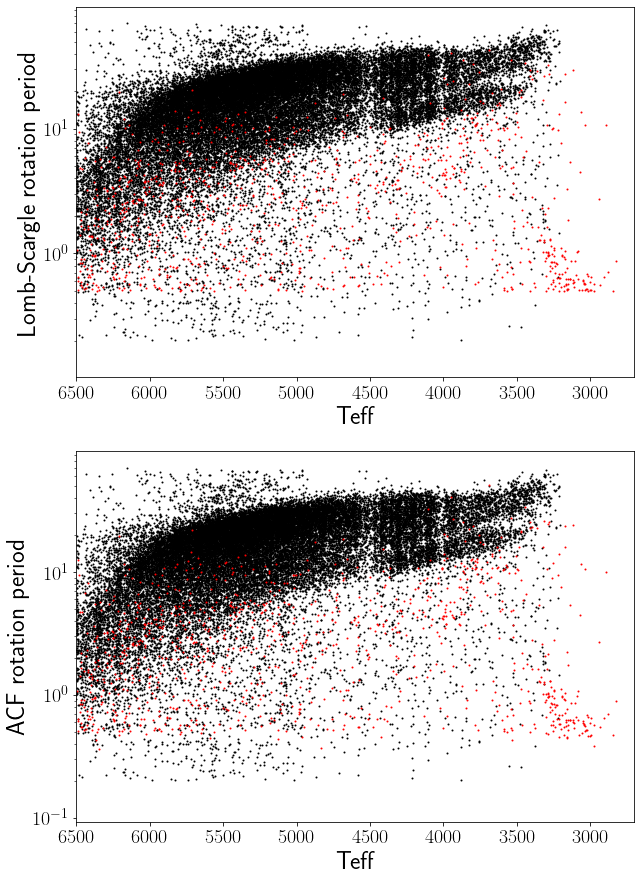

In [30]:

f, (ax1,ax2) = plt.subplots(2,1,figsize=(10,15))

#plotting


ax2.scatter(final_table['Teff'],final_table['acf_rp1'],s=1,color='r', zorder=1)
ax2.scatter(tempmq, rpmq, c = "k", s=1, zorder=0)
ax2.set_ylabel('ACF rotation period')
ax2.set_xlabel('Teff')
#ax2.set_ylim(0,50)
ax2.set_xlim(6500,2700)
ax2.set_yscale('log')

ax1.scatter(final_table['Teff'],final_table['ls_rp1'],s=1,color='r', zorder=1)
ax1.scatter(tempmq, rpmq, c = "k", s=1, zorder=0)
ax1.set_ylabel('Lomb-Scargle rotation period')
ax1.set_xlabel('Teff')
#ax1.set_ylim(0,50)
ax1.set_xlim(6500,2700)
ax1.set_yscale('log')



#  full sample - not just acf/ls agreement

(0.1, 50)

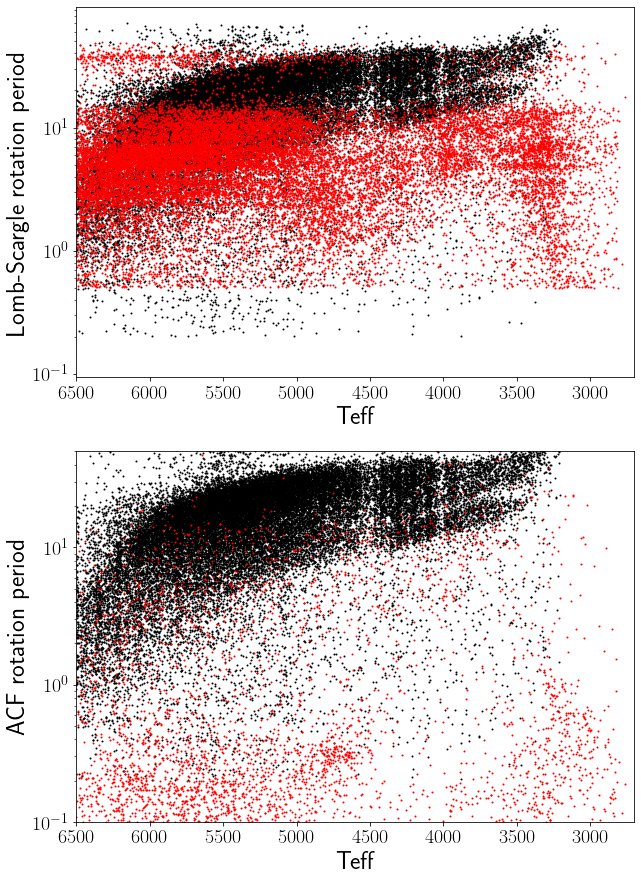

In [31]:

f, (ax1,ax2) = plt.subplots(2,1,figsize=(10,15))

#plotting
ax1.scatter(fullt['Teff'],fullt['ls_rp1'],s=1,color='r', zorder=1)
ax1.scatter(tempmq, rpmq, c = "k", s=1, zorder=0)
ax1.set_ylabel('Lomb-Scargle rotation period')
ax1.set_xlabel('Teff')
#ax1.set_ylim(0,50)
ax1.set_xlim(6500,2700)
ax1.set_yscale('log')

ax2.scatter(fullt['Teff'],fullt['acf_rp1'],s=1,color='r', zorder=1)
ax2.scatter(tempmq, rpmq, c = "k", s=1, zorder=0)
ax2.set_ylabel('ACF rotation period')
ax2.set_xlabel('Teff')
#ax2.set_ylim(0,50)
ax2.set_xlim(6500,2700)
ax2.set_yscale('log')
ax2.set_ylim(.1,50)

In [32]:
fullt

<Table masked=True length=22630>
    ID    TOTALnum_sectors          Rvar         ... raddflag wdflag   objID   
   str9        int64              float64        ...  int64   int64   bytes10  
--------- ---------------- --------------------- ... -------- ------ ----------
117935303                1 0.0018316209316253662 ...        1      0 1420035826
118010415                1 0.0033662557601930043 ...        1      0 1420037348
118053599                1   0.03137373924255371 ...        1      0 1421763271
118054887                1   0.02897542715072632 ...        1      0 1423434296
118055540                1  0.004783421754836925 ...        1      0 1423434592
118060883                1  0.003953725099563599 ...        1      0 1425185189
118074571                3  0.003131073713302568 ...        0      0  644506696
118078652                2   0.12548530101776123 ...        1      0  644509732
118079187                2 0.0027418762445450273 ...        1      0  644510128
118079457                2   0.09145613312721246 ...        1      0  644510318
      ...              ...                   ... ...      ...    ...        ...
 90832108                1  0.008478307723998935 ...        1      0 1017443682
 90832769                1  0.007510197162628129 ...        1      0 1017444235
 90836525                1   0.12321843206882477 ...        1      0 1017447252
 97605892                1  0.012793710827827431 ...        0      0  985258525
 97616288                1  0.002616298198700129 ...        1      0  985268515
 97739446                1  0.002626934647560031 ...        1      0  985276281
 97876254                1   0.04368203878402699 ...        1      0  985302109
 97876609                1   0.06516473889350882 ...        1      0  985302451
 98139294                1   0.02658629715442673 ...        1      0  986759192
 98237214                1   0.01701425909996024 ...        1      0  986764261

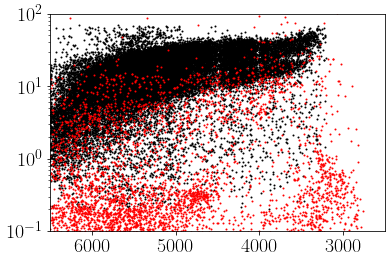

In [33]:
plt.scatter(fullt['Teff'],fullt['acf_rp1'],s=1,color='r', zorder=1)
plt.scatter(tempmq, rpmq, c = "k", s=1, zorder=0)
plt.xlim(6500,2500)
plt.yscale('log')
plt.ylim(.1,100);